In [3]:
library(xts)
library(highfrequency)
library(zoo)
library(rugarch)
library(forecast)

In [4]:
data <- load("2.RData")

# PART 1

In [5]:
summary(aaba)
head(aaba)
tail(aaba)

     Index                 ret                   RV          
 Min.   :2010-01-05   Min.   :-0.1456009   Min.   :0.006004  
 1st Qu.:2011-07-04   1st Qu.:-0.0102603   1st Qu.:0.011095  
 Median :2013-01-10   Median : 0.0000000   Median :0.013482  
 Mean   :2013-01-08   Mean   : 0.0003804   Mean   :0.015105  
 3rd Qu.:2014-07-14   3rd Qu.: 0.0109030   3rd Qu.:0.017246  
 Max.   :2016-01-22   Max.   : 0.1408073   Max.   :0.064166  
      RV_p               RV_n                RS                 RK        
 Min.   :0.003792   Min.   :0.003450   Min.   :-7.11046   Min.   : 2.131  
 1st Qu.:0.007637   1st Qu.:0.007560   1st Qu.:-0.58050   1st Qu.: 3.749  
 Median :0.009484   Median :0.009435   Median : 0.02804   Median : 4.872  
 Mean   :0.010604   Mean   :0.010522   Mean   : 0.05455   Mean   : 6.327  
 3rd Qu.:0.012354   3rd Qu.:0.012188   3rd Qu.: 0.66002   3rd Qu.: 7.027  
 Max.   :0.058040   Max.   :0.053660   Max.   : 6.07520   Max.   :59.116  

                    ret         RV        RV_p        RV_n          RS
2010-01-05  0.015812921 0.01300468 0.008650219 0.009710589 -0.71344554
2010-01-06 -0.005827522 0.01127652 0.007593807 0.008336312 -0.12428705
2010-01-07 -0.017689140 0.01359373 0.008427547 0.010666117 -1.13501968
2010-01-08 -0.006565228 0.01184399 0.009301831 0.007331852  1.29791010
2010-01-11  0.004182856 0.01570602 0.008794856 0.013012671 -2.42049970
2010-01-12 -0.005980879 0.01490788 0.010413341 0.010668040  0.02802119
                  RK
2010-01-05 14.170914
2010-01-06  2.848451
2010-01-07  8.112962
2010-01-08  9.459843
2010-01-11 14.951509
2010-01-12  2.650517

                    ret         RV       RV_p       RV_n         RS        RK
2016-01-14 -0.038625036 0.03254541 0.02515310 0.02065249  0.5873096  3.974951
2016-01-15 -0.014579000 0.02998108 0.02387234 0.01813772  1.4368795  7.835860
2016-01-19  0.019280151 0.02722255 0.01720726 0.02109449 -1.1457304  7.803336
2016-01-20 -0.029233897 0.03754555 0.02481343 0.02817733 -0.6167864  4.309256
2016-01-21 -0.008313176 0.02866310 0.02119128 0.01930033  0.2018993  3.055611
2016-01-22  0.041559114 0.02964534 0.02041901 0.02149209 -0.3155532 11.556668

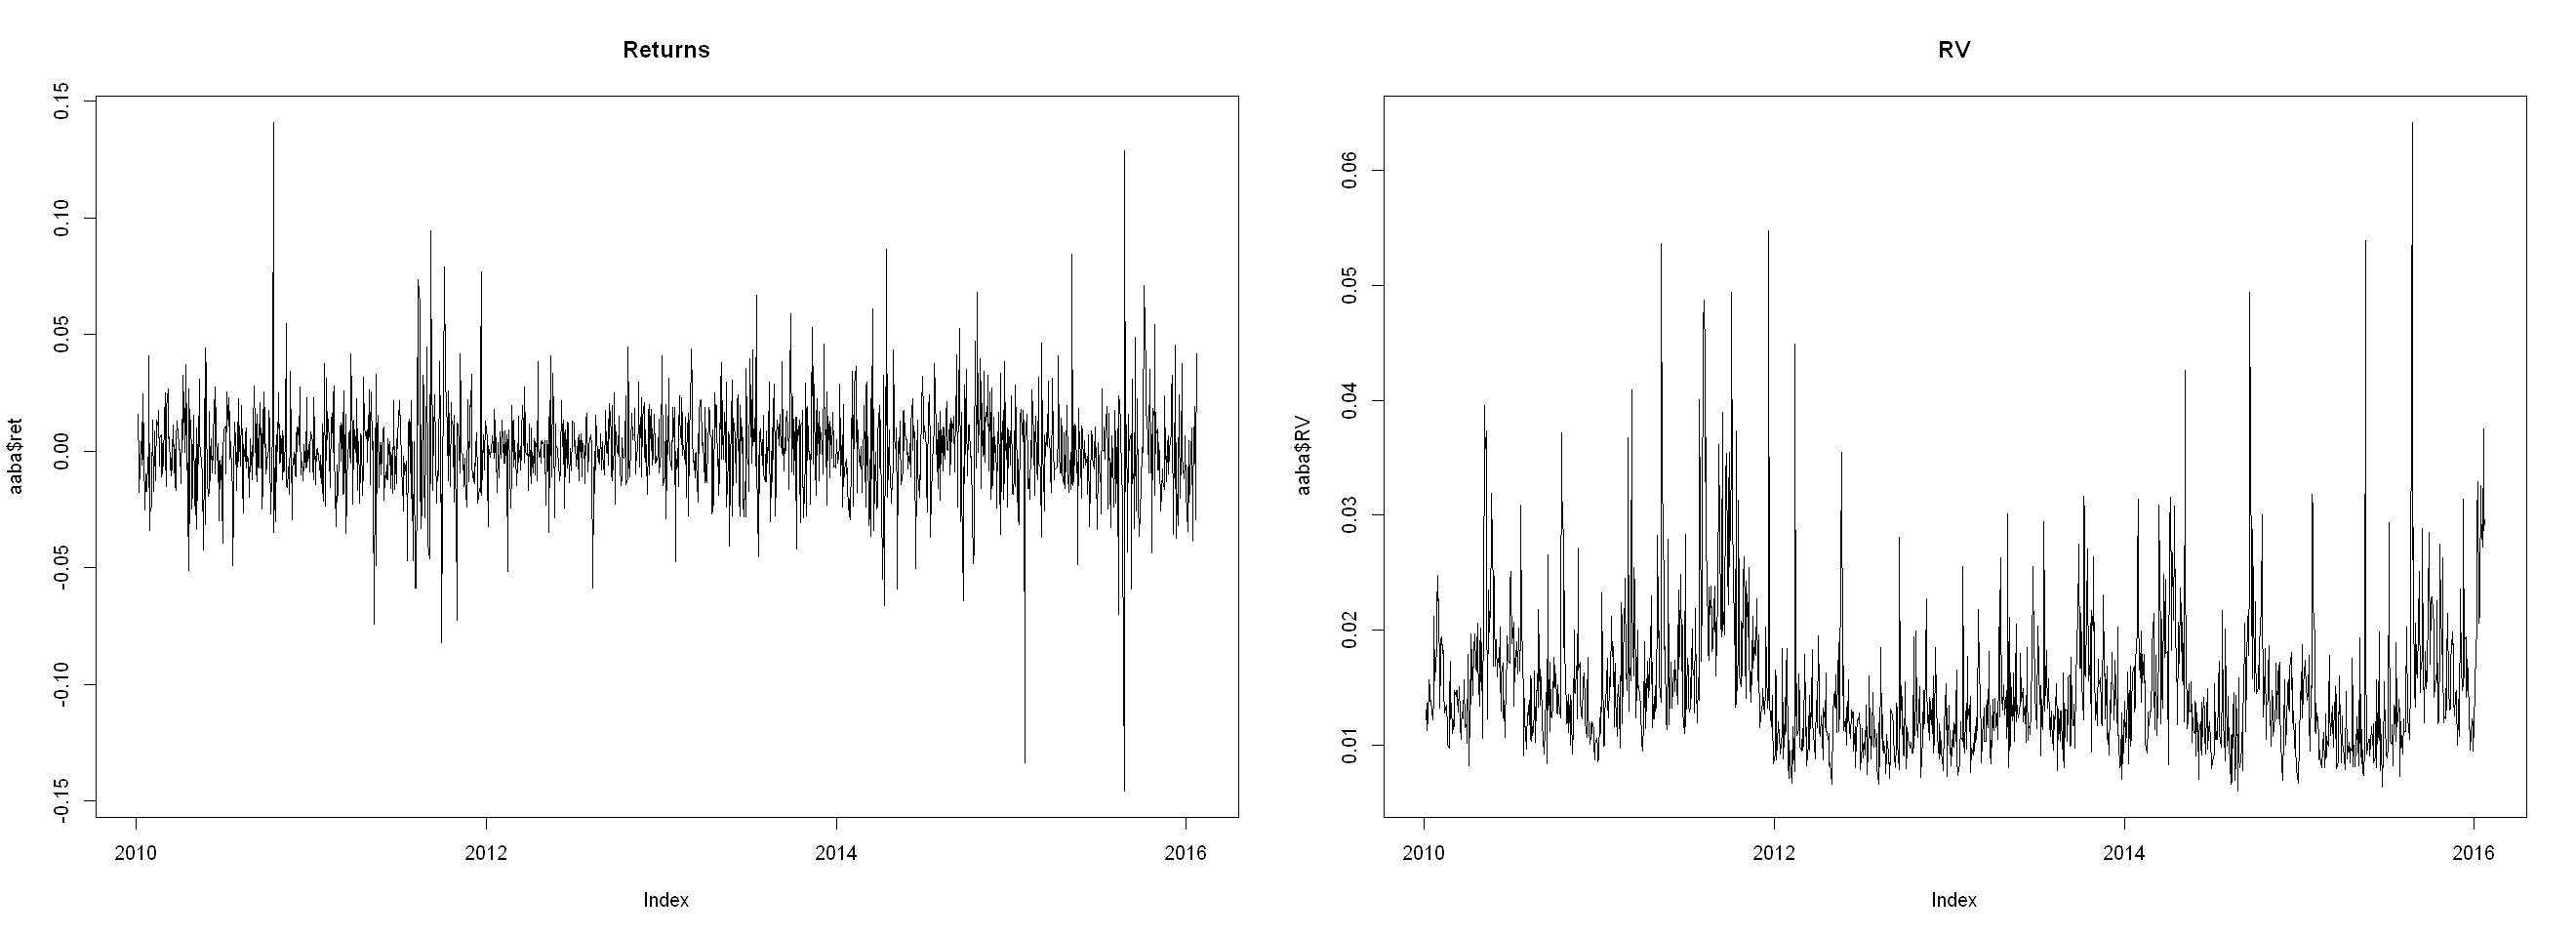

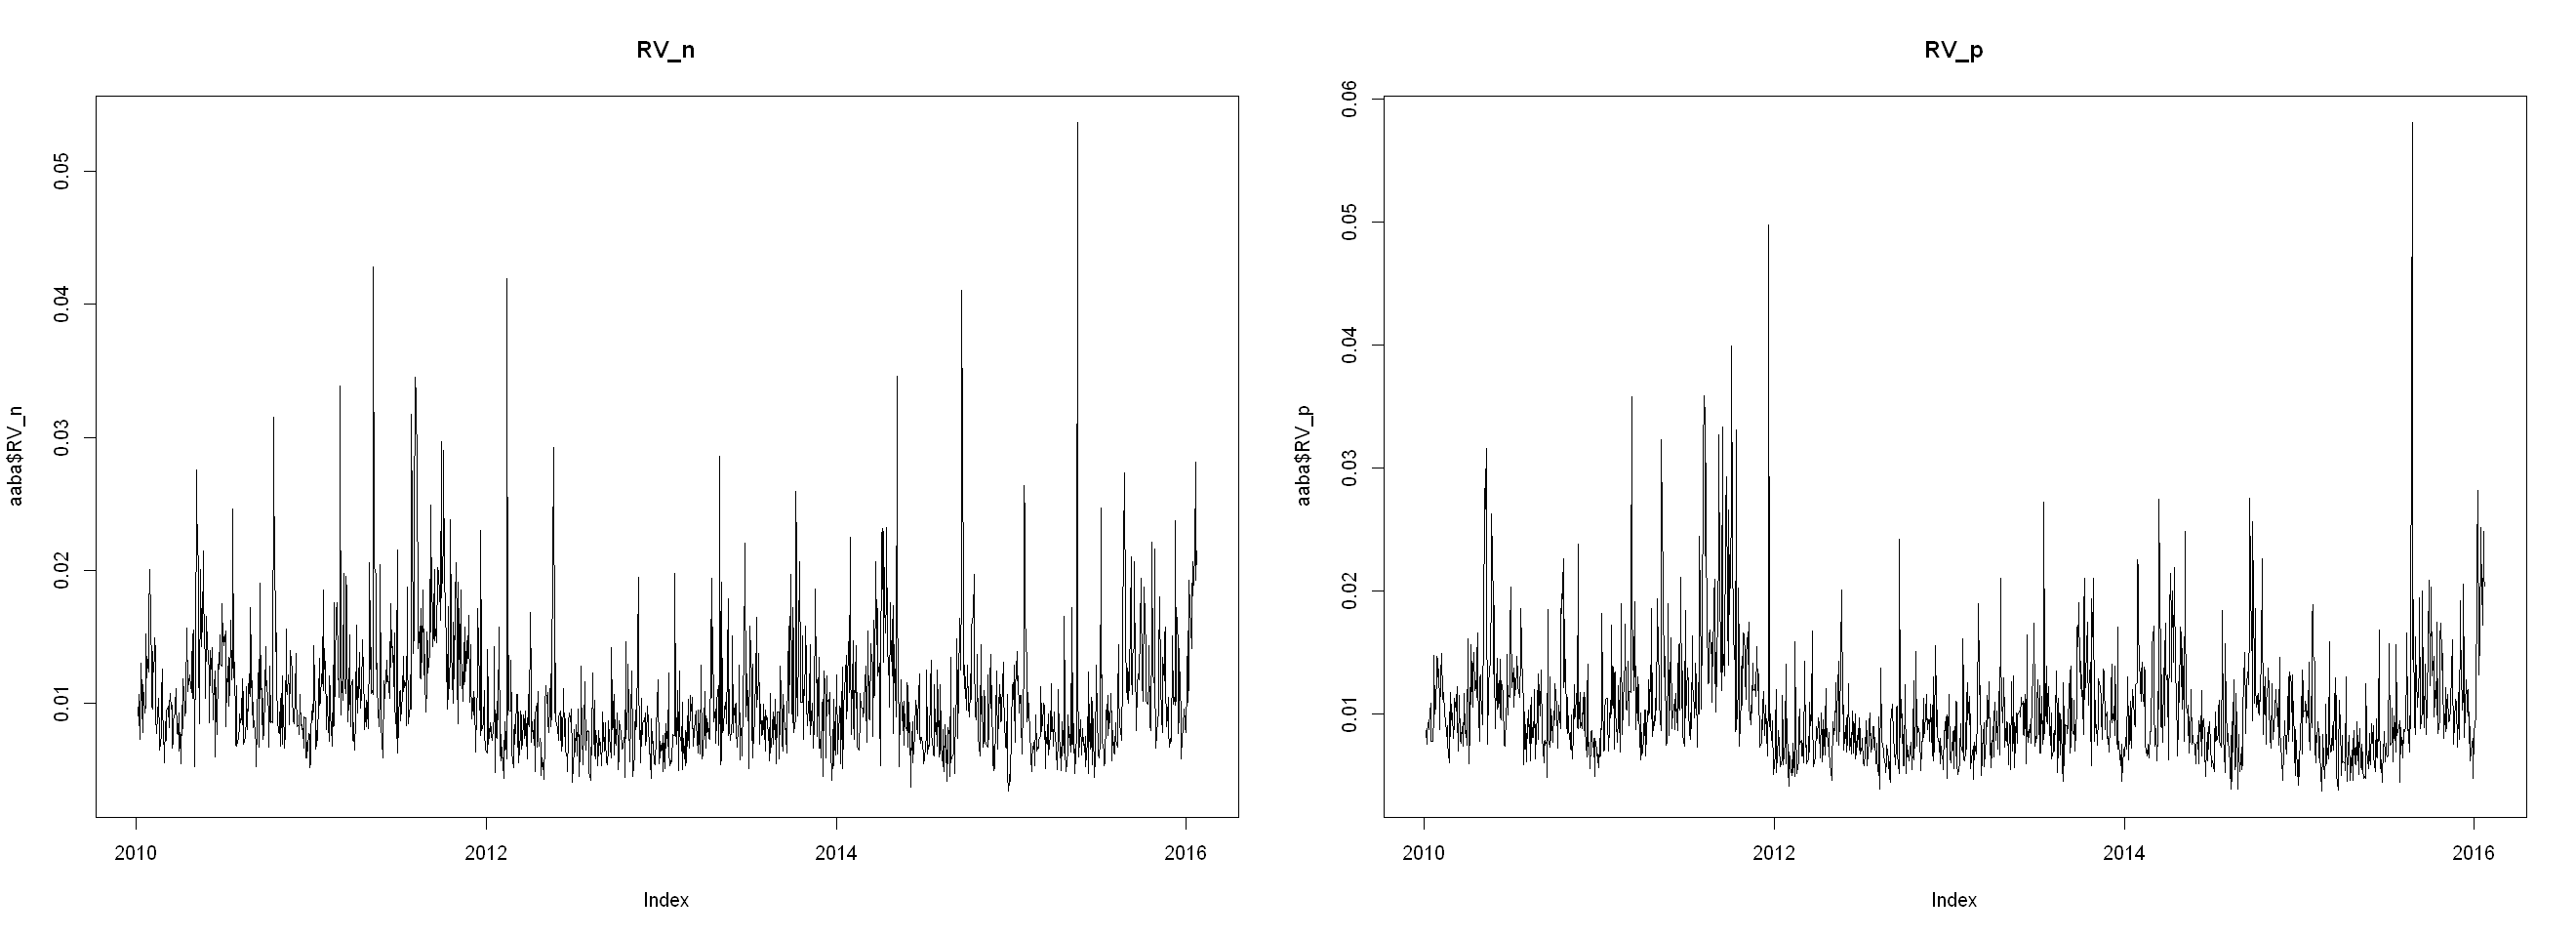

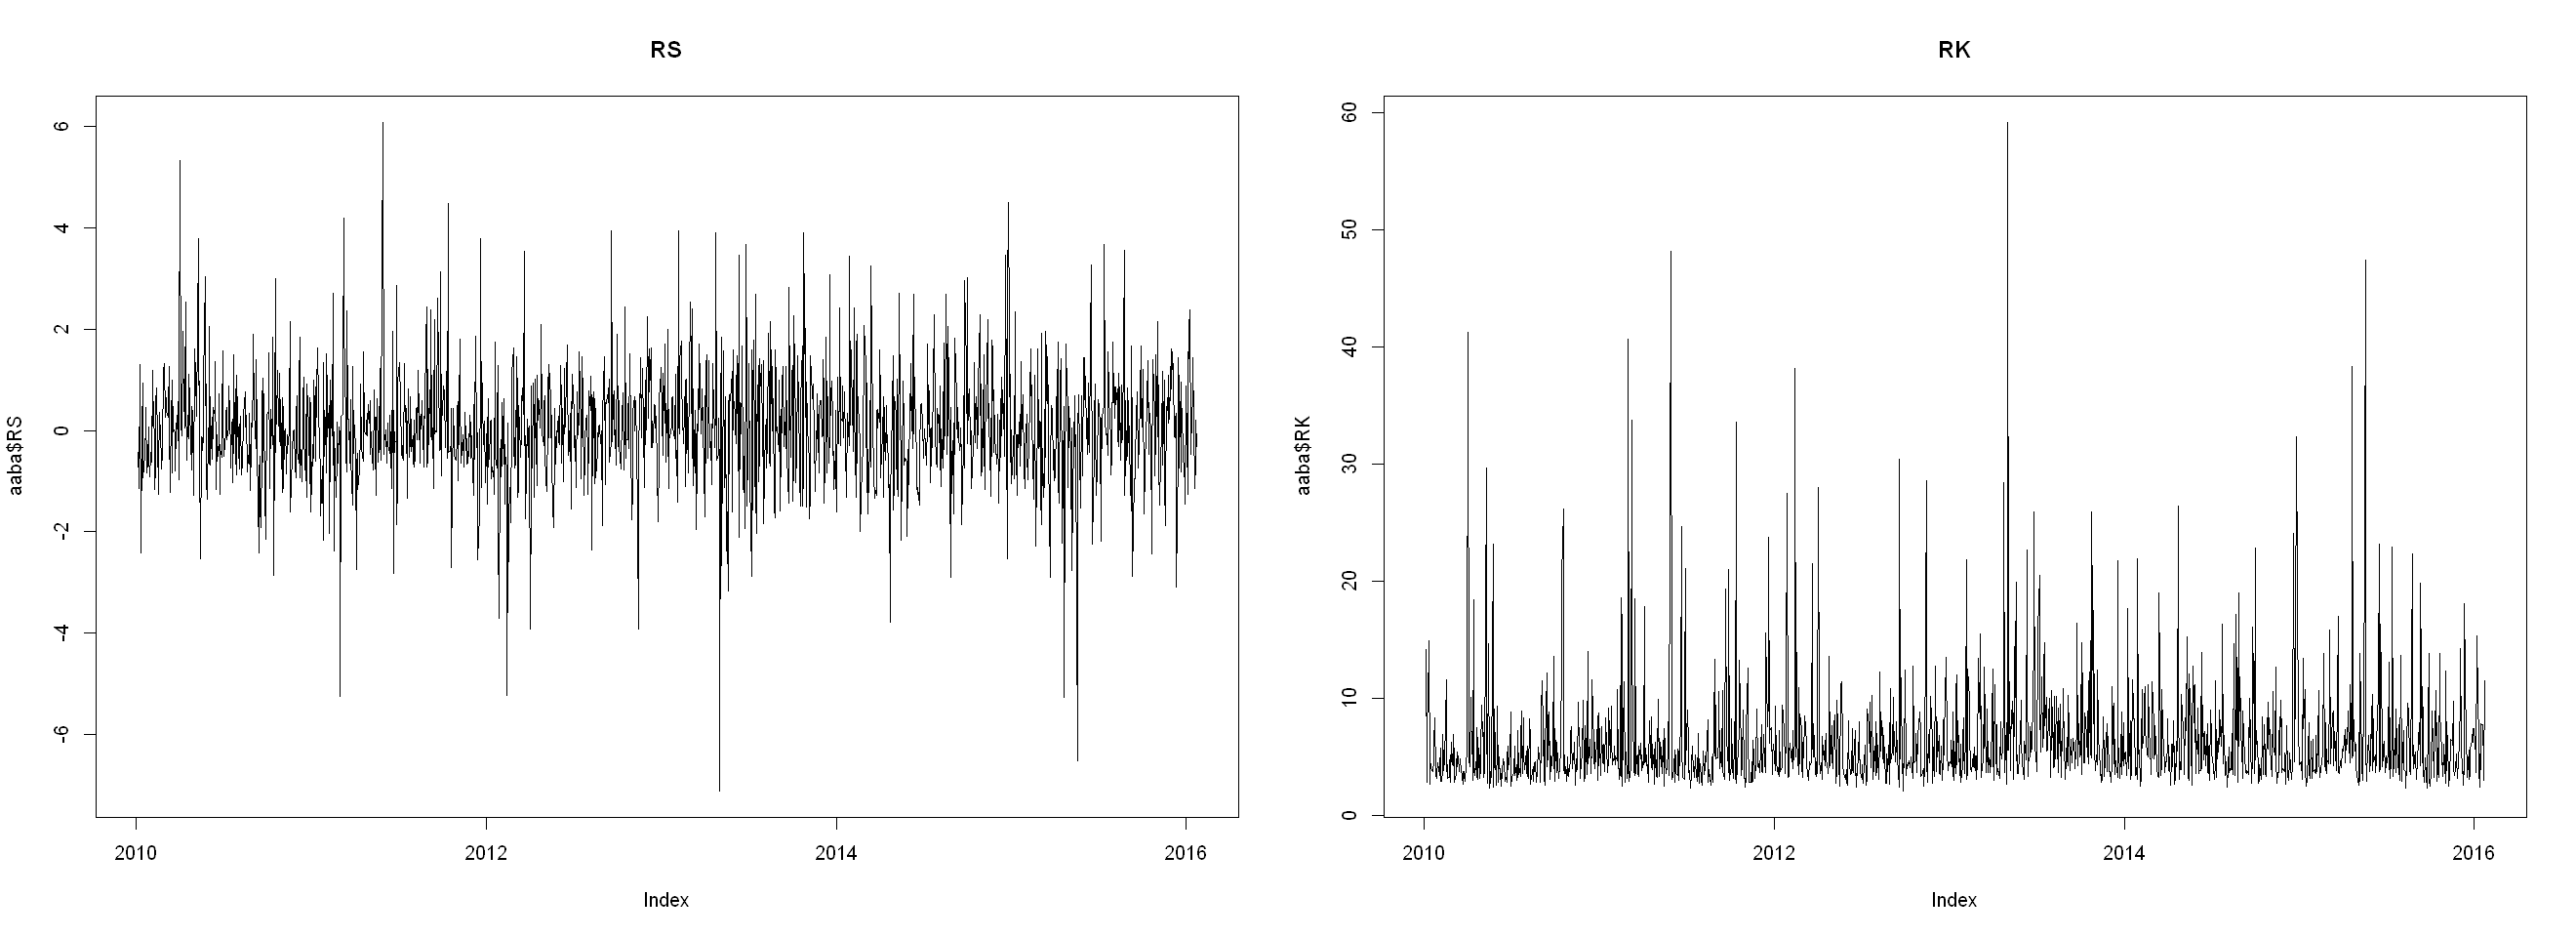

In [8]:
options(repr.plot.width = 22, repr.plot.height = 8)
par(mfrow = c(1, 2))

plot.zoo(aaba$ret,main = "Returns")
plot.zoo(aaba$RV, main = "RV")
plot.zoo(aaba$RV_n, main = "RV_n")
plot.zoo(aaba$RV_p, main = "RV_p")
plot.zoo(aaba$RS, main = "RS")
plot.zoo(aaba$RK, main = "RK")

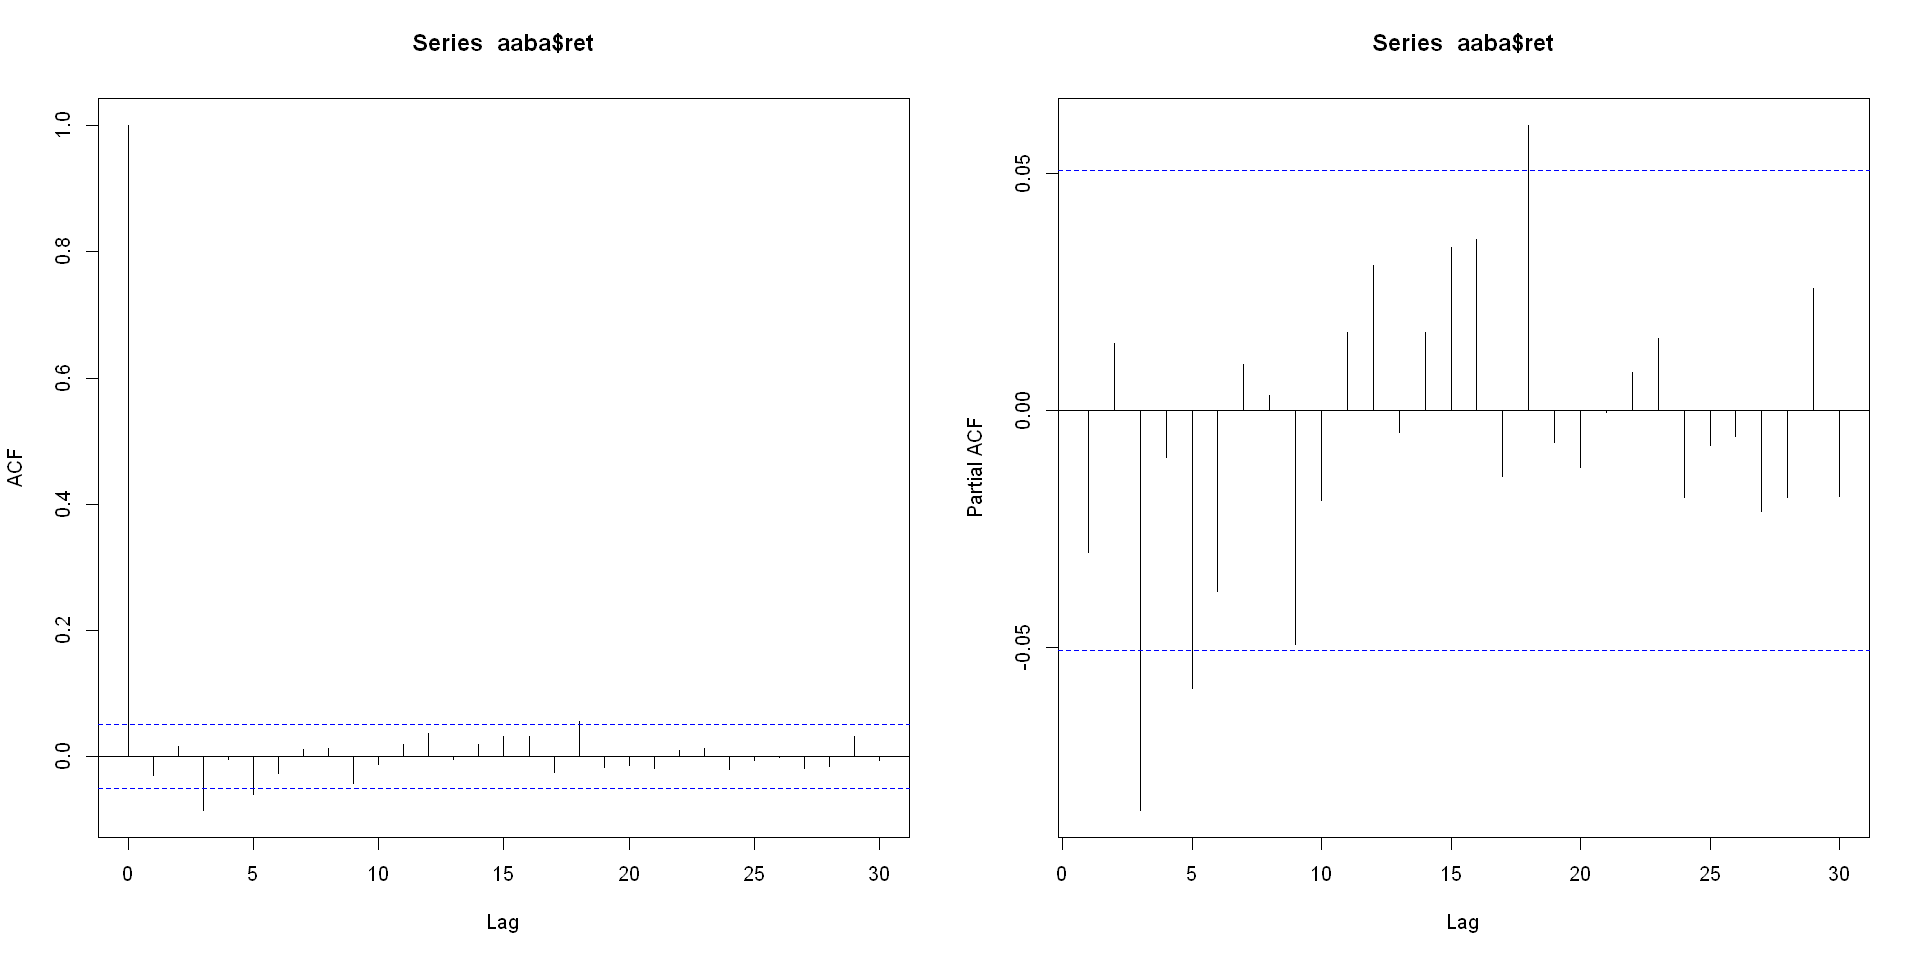

In [9]:
options(repr.plot.width = 16, repr.plot.height = 8)
par(mfrow = c(1, 2))

acf(aaba$ret, lag = 30)
pacf(aaba$ret, lag = 30)

# PART 2

## AR(1)-RV

In [10]:
AR_RV <- Arima(aaba$RV, order = c(1, 0, 0))
summary(AR_RV)

Series: aaba$RV 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.5305  0.0151
s.e.  0.0219  0.0003

sigma^2 = 2.856e-05:  log likelihood = 5720.11
AIC=-11434.22   AICc=-11434.2   BIC=-11418.28

Training set error measures:
                       ME        RMSE         MAE       MPE     MAPE      MASE
Training set 4.738511e-06 0.005340401 0.003540377 -9.001822 23.78579 0.8995801
                    ACF1
Training set -0.09672341

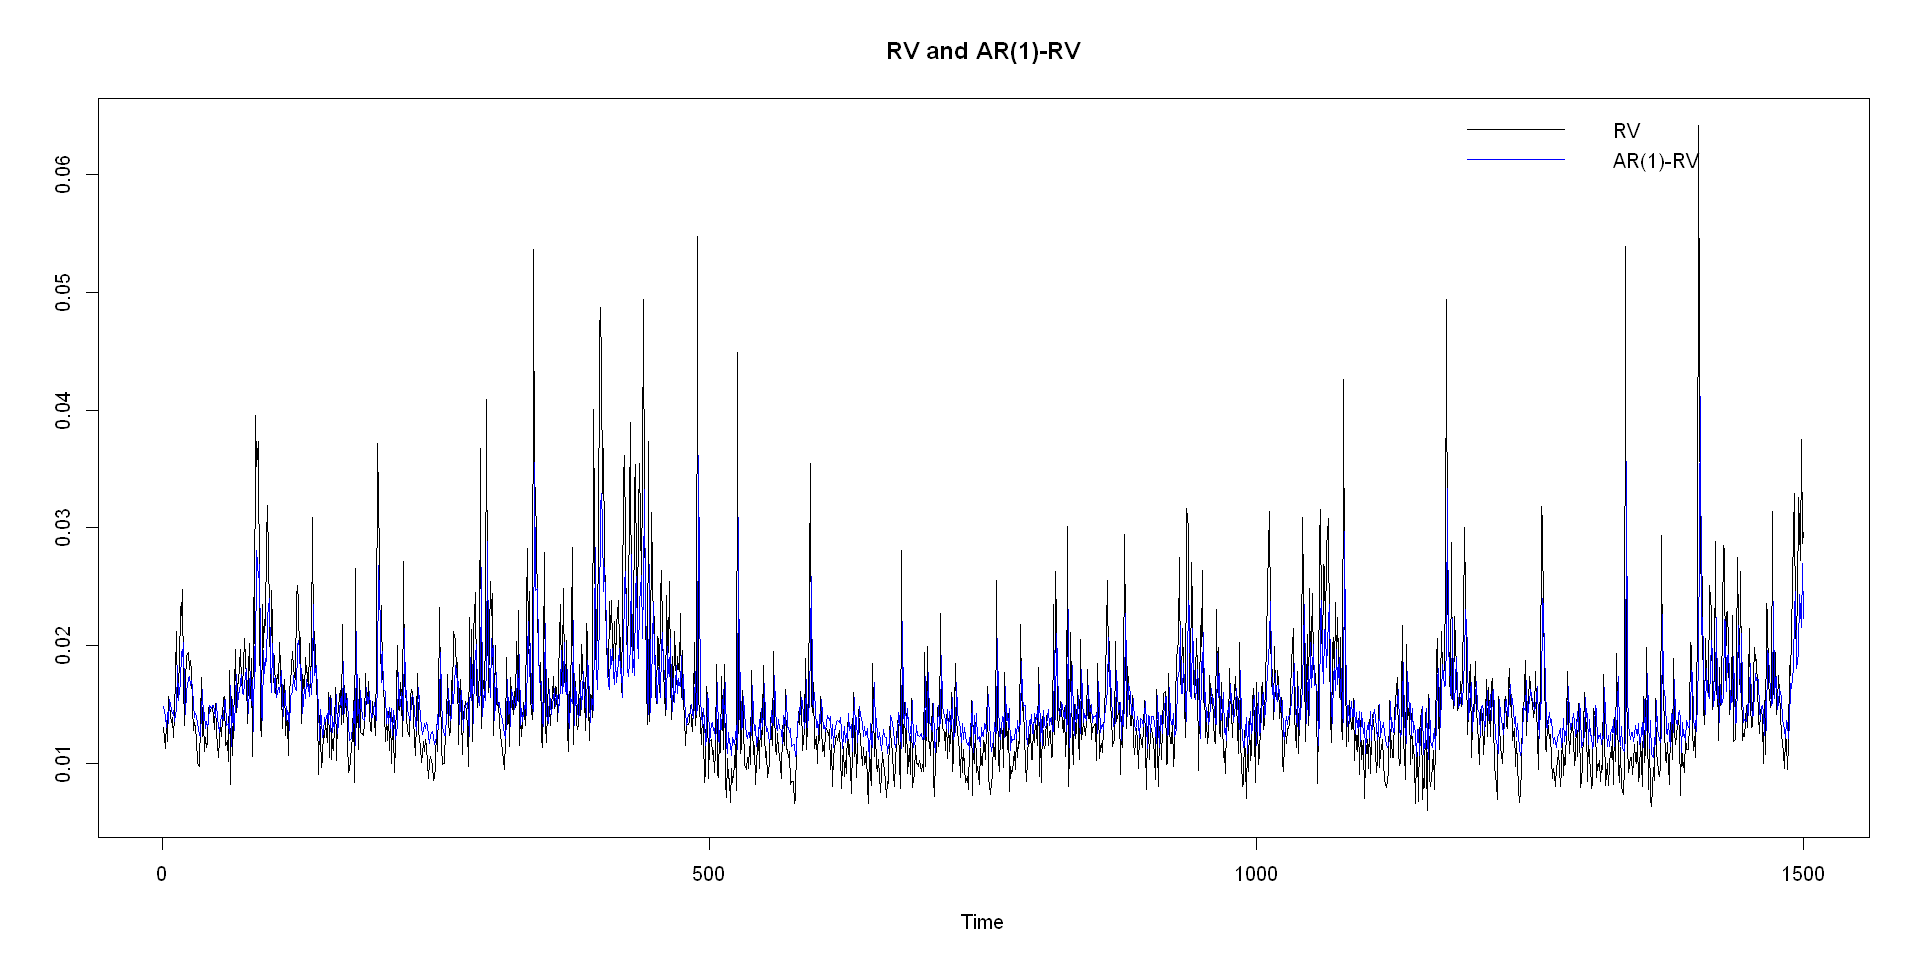

In [11]:
plot.ts((aaba$RV), ylab = NA, main = "RV and AR(1)-RV")
lines(fitted(AR_RV), col = "blue")
legend("topright", legend = c("RV", "AR(1)-RV"),
       col = c("black", "blue"), lwd = 1, bty = "n")

## HAR

In [12]:
L <- nrow(aaba)

In [13]:
RV5 <- unlist(lapply(lapply(1:(L - 4), function (t) {return(aaba$RV[t:(t + 4)])}), mean))
RV22 <- unlist(lapply(lapply(1:(L - 21), function (t) {return(aaba$RV[t:(t + 21)])}), mean))

In [14]:
HAR<- HARmodel(data = aaba$RV , periods = c(1,5,22), RVest = c("rCov"),
                type = "HAR", h = 1, transform = "sqrt", inputType = "RM")
summary(HAR)


Call:
"sqrt(RV1) = beta0  +  beta1 * sqrt(RV1) +  beta2 * sqrt(RV5) +  beta3 * sqrt(RV22)"

Residuals:
      Min        1Q    Median        3Q       Max 
-0.049625 -0.011312 -0.003057  0.007587  0.130609 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
beta0 0.019093   0.004011   4.760 2.12e-06 ***
beta1 0.318196   0.040486   7.859 7.39e-15 ***
beta2 0.272548   0.053382   5.106 3.73e-07 ***
beta3 0.247189   0.053711   4.602 4.54e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01817 on 1474 degrees of freedom
Multiple R-squared:  0.3715,	Adjusted R-squared:  0.3703 
F-statistic: 290.5 on 3 and 1474 DF,  p-value: < 2.2e-16


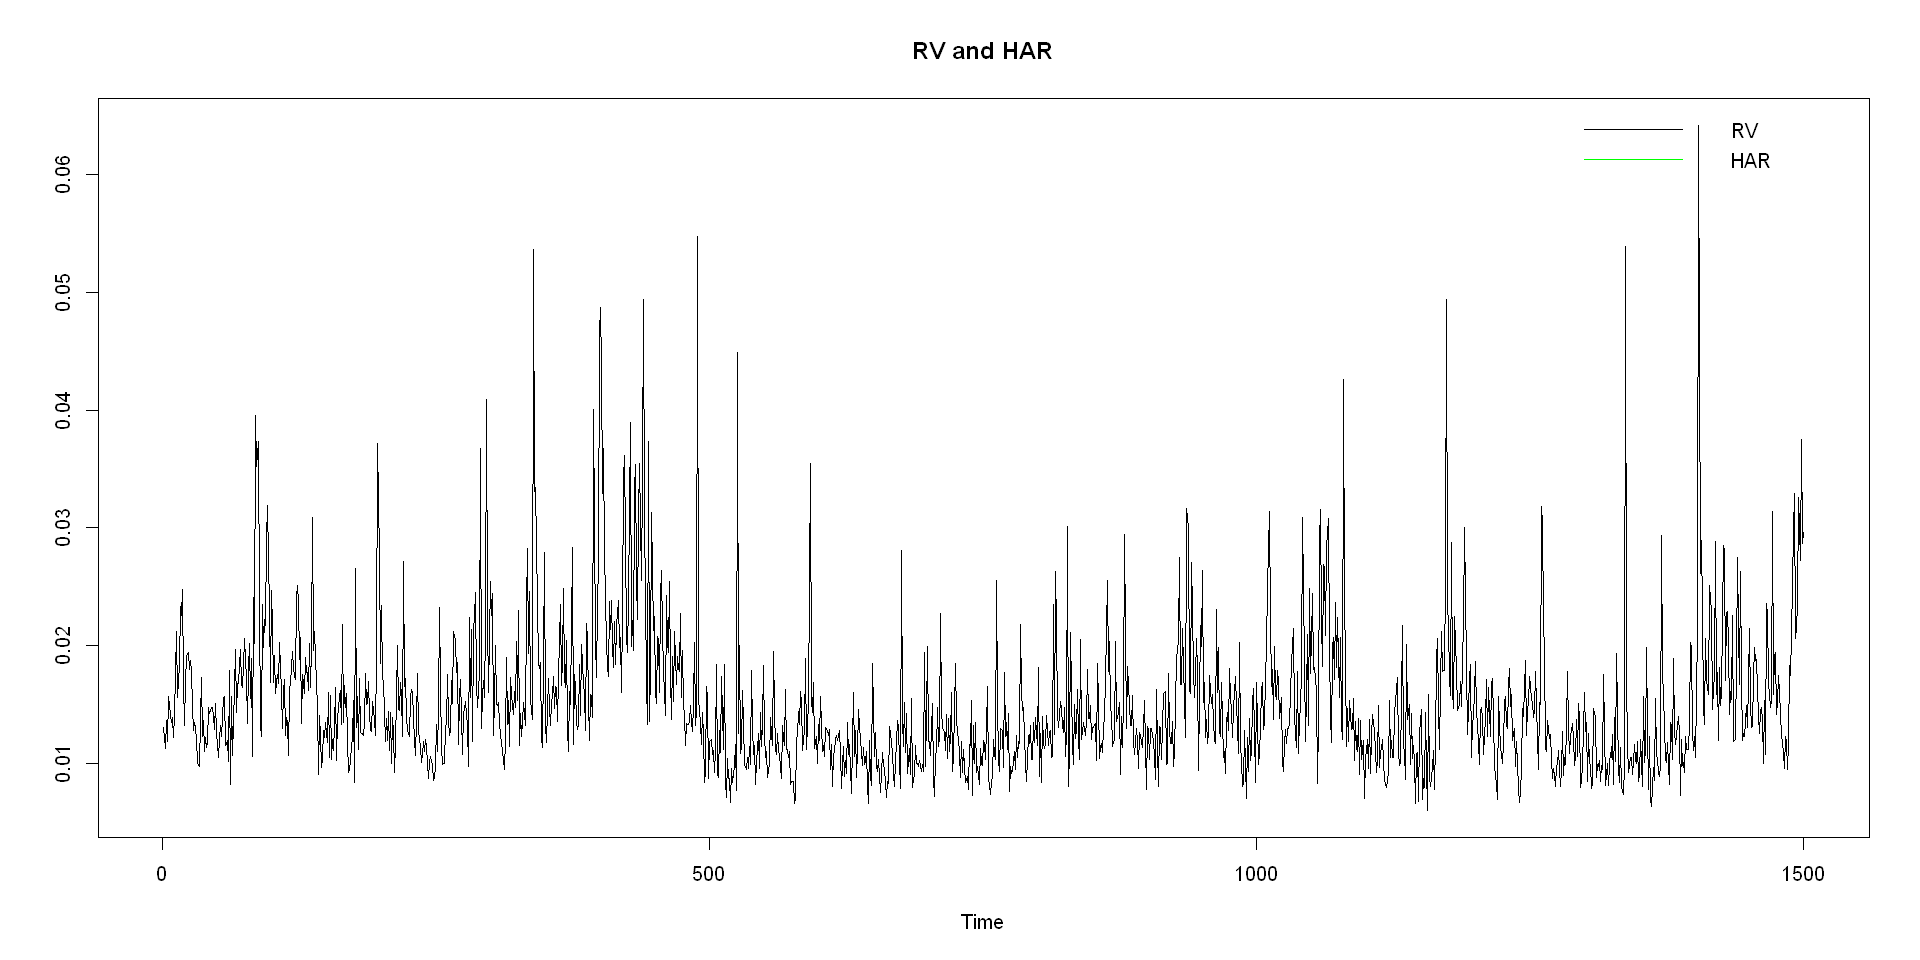

In [15]:
plot.ts((aaba$RV), ylab = NA,  main = "RV and HAR")
lines(as.numeric(HAR$fitted.values), col = "green", lwd = 1)
legend("topright", legend = c("RV", "HAR"),
       col = c("black", "green"), lwd = 1, bty = "n")

## HAR-RS

In [17]:
HAR_RS<-lm(aaba$RV[23:L] ~ aaba$RV_n[22:(L - 1)] + aaba$RV_p[22:(L - 1)] + RV5[18:(length(RV5) - 1)] + RV22[1:(length(RV22)- 1)])
summary(HAR_RS)


Call:
lm(formula = aaba$RV[23:L] ~ aaba$RV_n[22:(L - 1)] + aaba$RV_p[22:(L - 
    1)] + RV5[18:(length(RV5) - 1)] + RV22[1:(length(RV22) - 
    1)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.013968 -0.002847 -0.000994  0.001604  0.047554 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.0024929  0.0005733   4.349 1.46e-05 ***
aaba$RV_n[22:(L - 1)]      0.2681985  0.0410823   6.528 9.13e-11 ***
aaba$RV_p[22:(L - 1)]      0.2091205  0.0423002   4.944 8.54e-07 ***
RV5[18:(length(RV5) - 1)]  0.2579527  0.0534378   4.827 1.53e-06 ***
RV22[1:(length(RV22) - 1)] 0.2448454  0.0559565   4.376 1.30e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005144 on 1473 degrees of freedom
Multiple R-squared:  0.3407,	Adjusted R-squared:  0.339 
F-statistic: 190.3 on 4 and 1473 DF,  p-value: < 2.2e-16


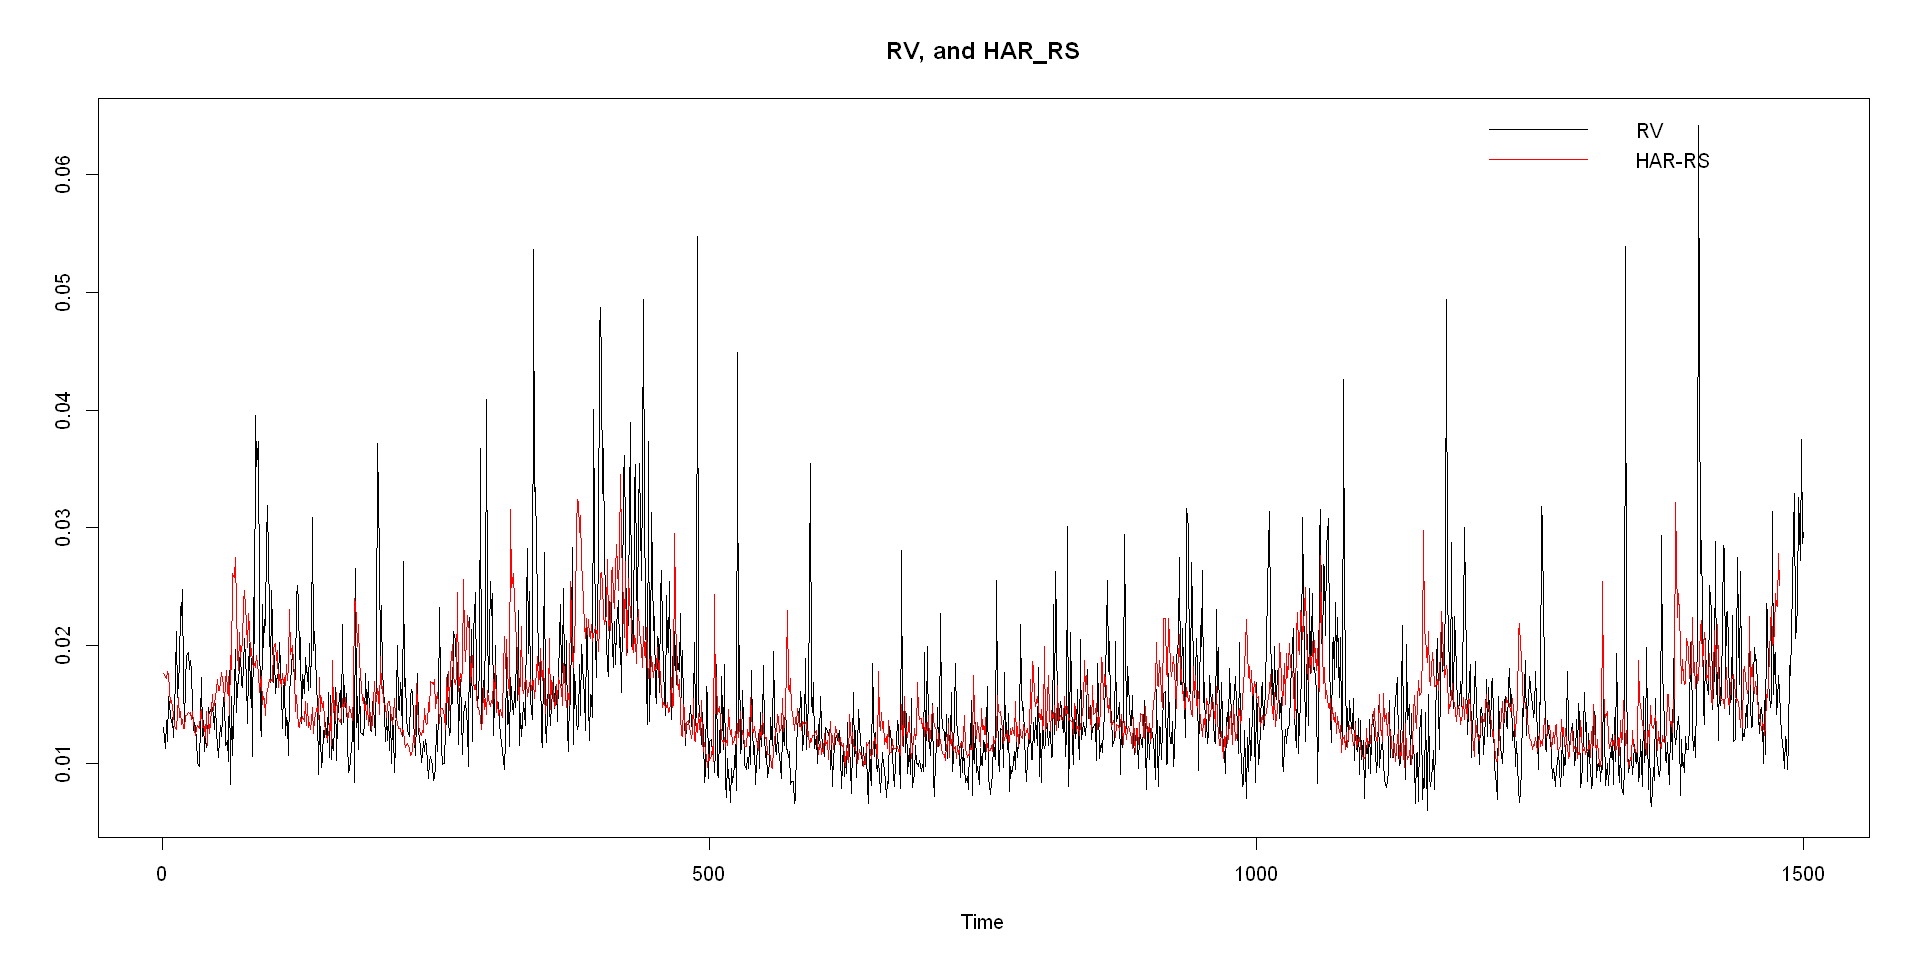

In [18]:
plot.ts((aaba$RV), ylab = NA,  main = "RV, and HAR_RS")
lines(as.numeric(HAR_RS$fitted.values), col = "red")
legend("topright", legend = c("RV", "HAR-RS"),
       col = c("black", "red"), lwd = 1, bty = "n")

## HAR-Rskew-RKurt

In [19]:
HAR_Rskew_Rkurt<-lm(aaba$RV[23:L] ~ aaba$RV[22:(L - 1)] + RV5[18:(length(RV5) - 1)] + RV22[1:(length(RV22)- 1)] 
                    + aaba$RS[22:(L - 1)] + aaba$RK[22:(L - 1)])
summary(HAR_Rskew_Rkurt)


Call:
lm(formula = aaba$RV[23:L] ~ aaba$RV[22:(L - 1)] + RV5[18:(length(RV5) - 
    1)] + RV22[1:(length(RV22) - 1)] + aaba$RS[22:(L - 1)] + 
    aaba$RK[22:(L - 1)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.014057 -0.002859 -0.001008  0.001531  0.046742 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 3.556e-03  5.926e-04   6.001 2.47e-09 ***
aaba$RV[22:(L - 1)]         3.865e-01  3.232e-02  11.957  < 2e-16 ***
RV5[18:(length(RV5) - 1)]   2.308e-01  5.300e-02   4.354 1.43e-05 ***
RV22[1:(length(RV22) - 1)]  2.245e-01  5.556e-02   4.041 5.60e-05 ***
aaba$RS[22:(L - 1)]        -7.605e-05  1.149e-04  -0.662    0.508    
aaba$RK[22:(L - 1)]        -1.803e-04  2.954e-05  -6.104 1.32e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005095 on 1472 degrees of freedom
Multiple R-squared:  0.3537,	Adjusted R-squared:  0.3515 
F-statistic: 161.1 on 5 an

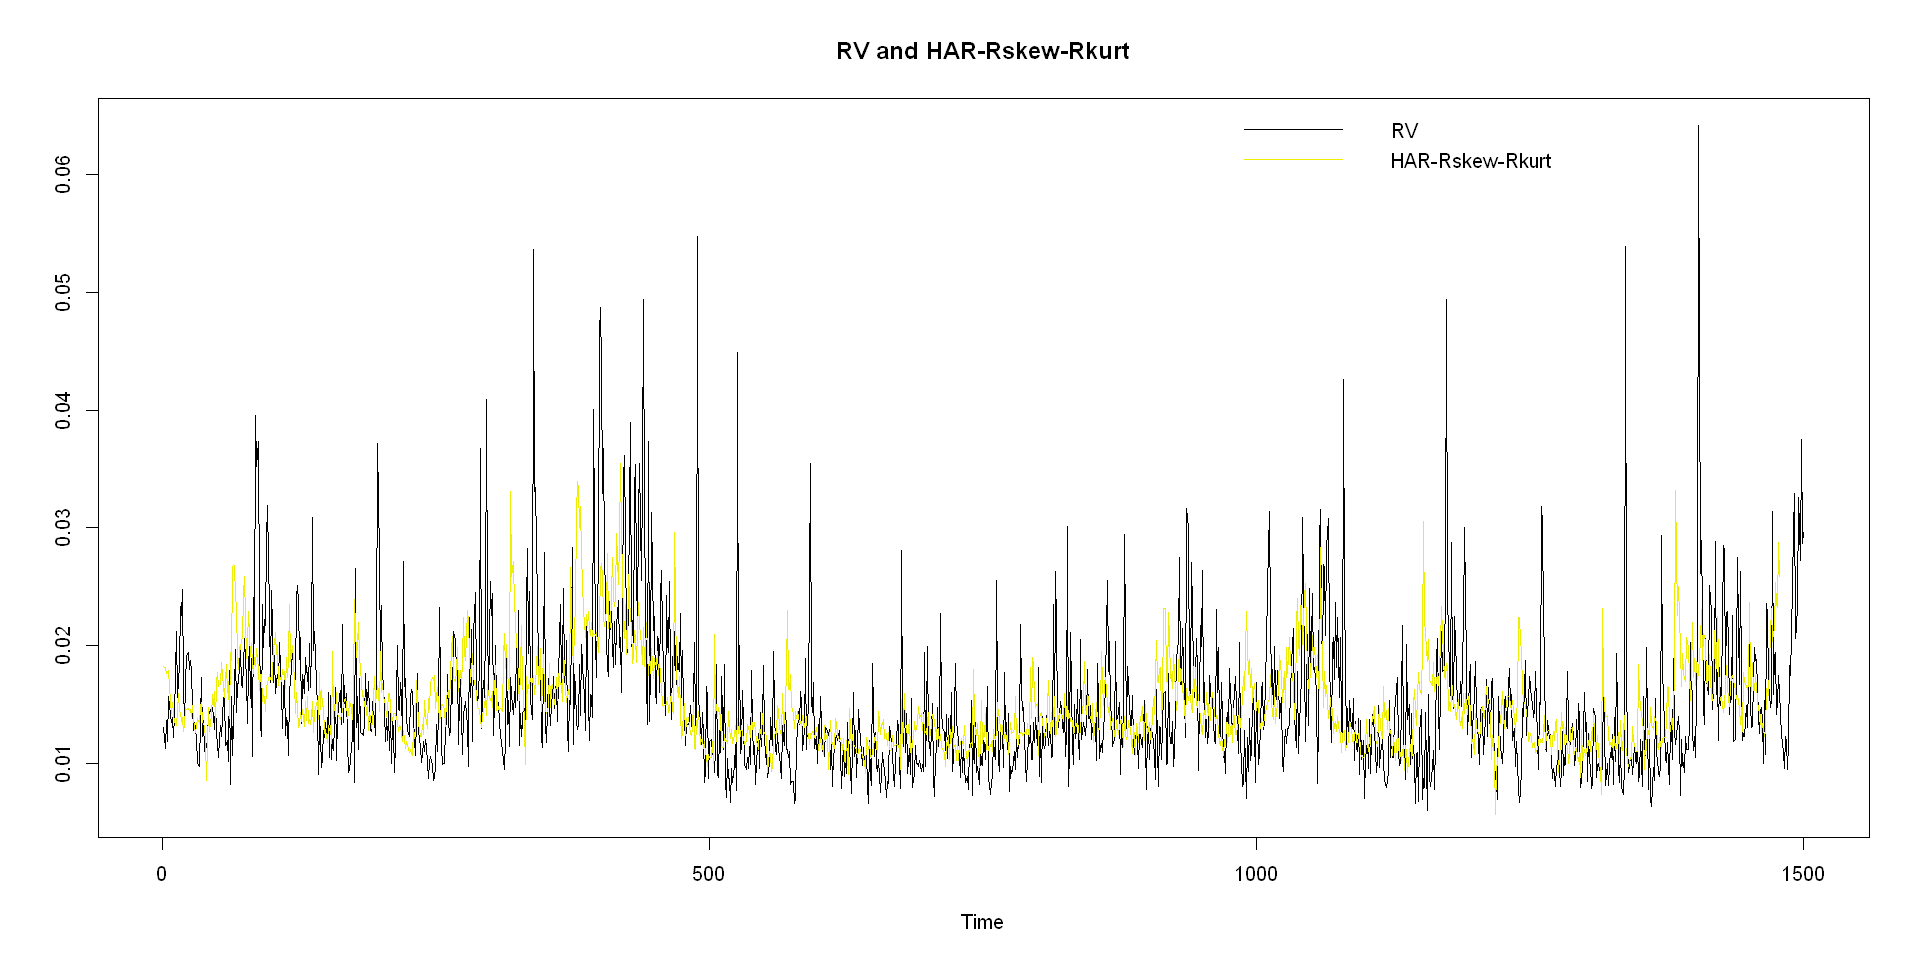

In [20]:
plot.ts((aaba$RV), ylab = NA,  main = "RV and HAR-Rskew-Rkurt")
lines(as.numeric(HAR_Rskew_Rkurt$fitted.values), col = "yellow2")
legend("topright", legend = c("RV",  "HAR-Rskew-Rkurt"),
       col = c("black","yellow2"), lwd = 1, bty = "n")


## Realized GARCH

In [21]:
realized_GARCH_spec <- ugarchspec(mean.model = list(armaOrder=c(0, 0), include.mean= TRUE), variance.model = list(model = 'realGARCH', garchOrder = c(1, 1)))

realized_GARCH_fit <- ugarchfit(realized_GARCH_spec, data = aaba$ret, solver = 'hybrid', realizedVol = aaba$RV)

realized_GARCH_fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: realGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000397    0.000434  0.91528 0.360046
omega   0.030783    0.255993  0.12025 0.904284
alpha1  1.000000    0.089540 11.16824 0.000000
beta1   0.473405    0.040011 11.83200 0.000000
eta11  -0.022095    0.007034 -3.14099 0.001684
eta21   0.028997    0.002891 10.02925 0.000000
delta   0.388021    0.025043 15.49404 0.000000
lambda  0.265876    0.004903 54.22203 0.000000
xi     -1.143008    0.200029 -5.71422 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000397    0.000393  1.012240 0.311423
omega   0.030783    0.388713  0.079193 0.936879
alpha1  1.000000    0.205903  4.856657 0.000001
b

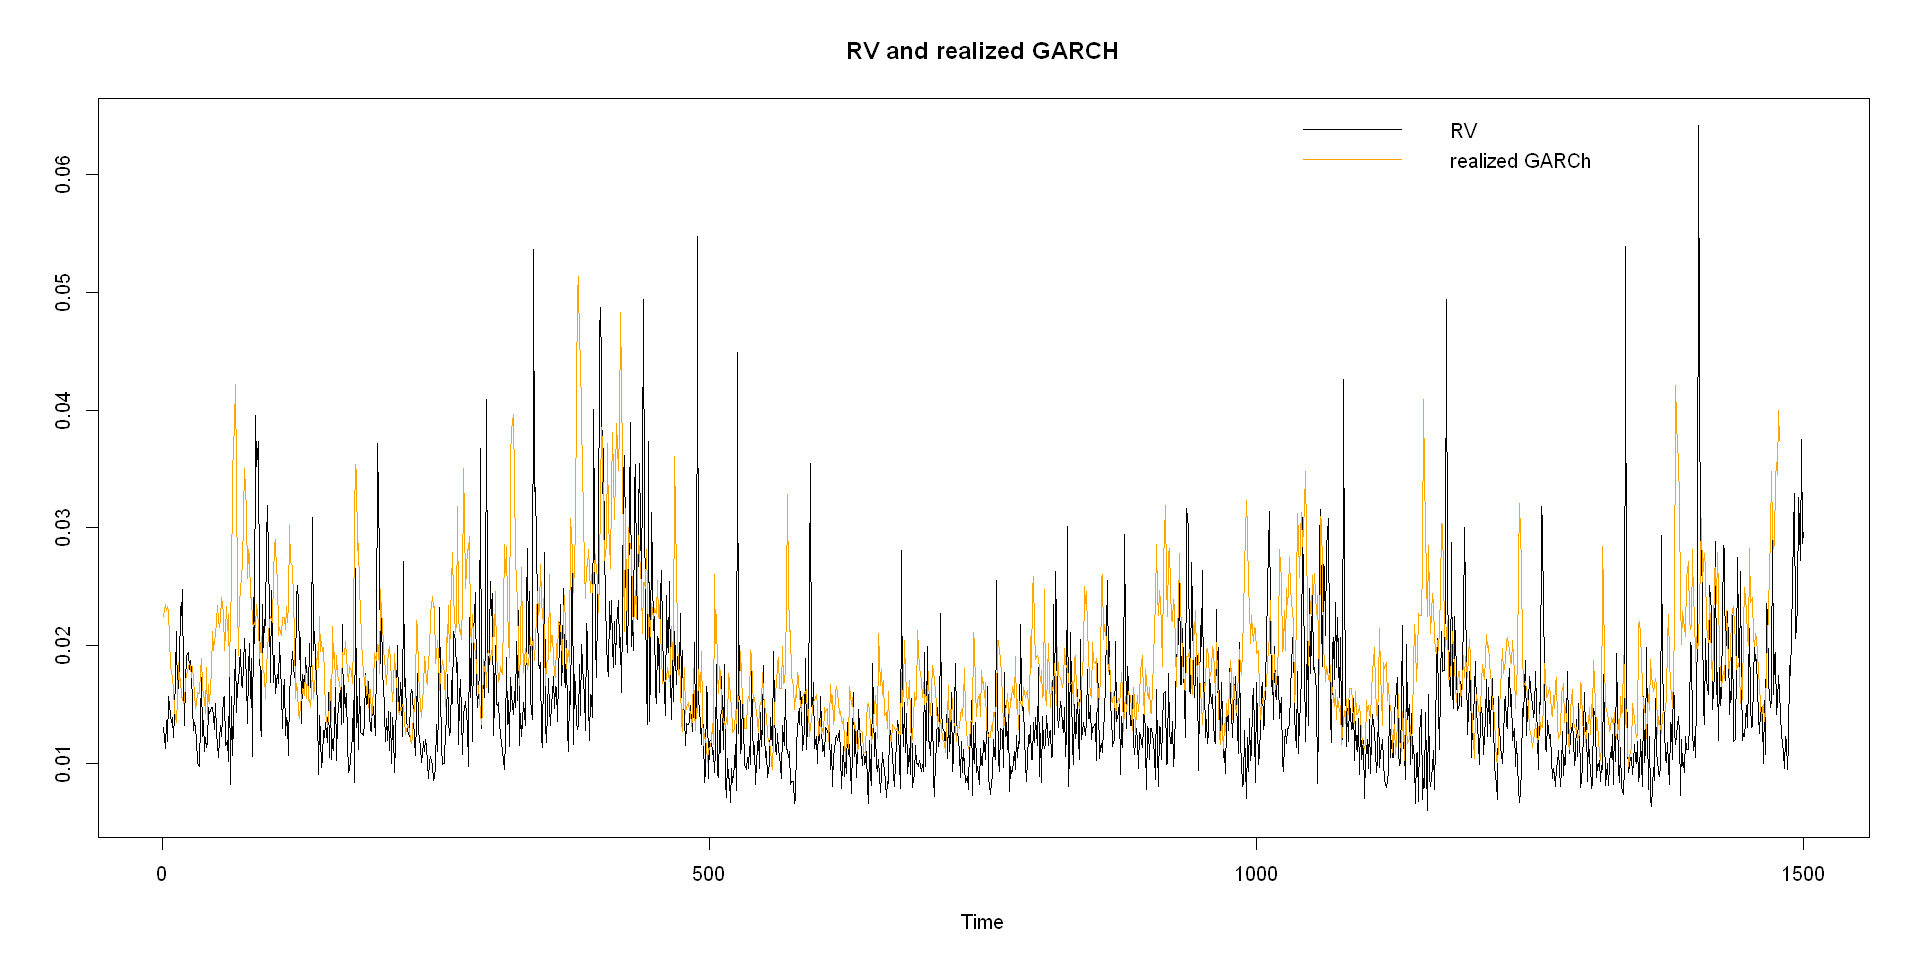

In [22]:
plot.ts((aaba$RV), main = "RV and realized GARCH", ylab = NA)
lines(realized_GARCH_fit@fit$sigma[23:1500], col = "orange")
legend("topright", legend = c("RV",  "realized GARCh"),
       col = c("black","orange"), lwd = 1, bty = "n")

## ARMA-GARCH

In [23]:
ARMA_GARCH_spec <- ugarchspec(mean.model = list(armaOrder=c(1, 1), include.mean= TRUE), variance.model = list(garchOrder = c(1, 1)))

ARMA_GARCH_fit <- ugarchfit(ARMA_GARCH_spec, data = aaba$ret)

ARMA_GARCH_fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000572    0.000475   1.2031 0.228921
ar1    -0.908914    0.067611 -13.4432 0.000000
ma1     0.889245    0.073929  12.0284 0.000000
omega   0.000039    0.000018   2.1453 0.031925
alpha1  0.087964    0.028878   3.0461 0.002318
beta1   0.820554    0.067291  12.1941 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000572    0.000467   1.22572 0.220304
ar1    -0.908914    0.042122 -21.57828 0.000000
ma1     0.889245    0.045801  19.41538 0.000000
omega   0.000039    0.000047   0.81948 0.412512
alpha1  0.087964    0.070358   1.25024 0.211212
beta1   0.820554    0.173965   4.71677 0.000002



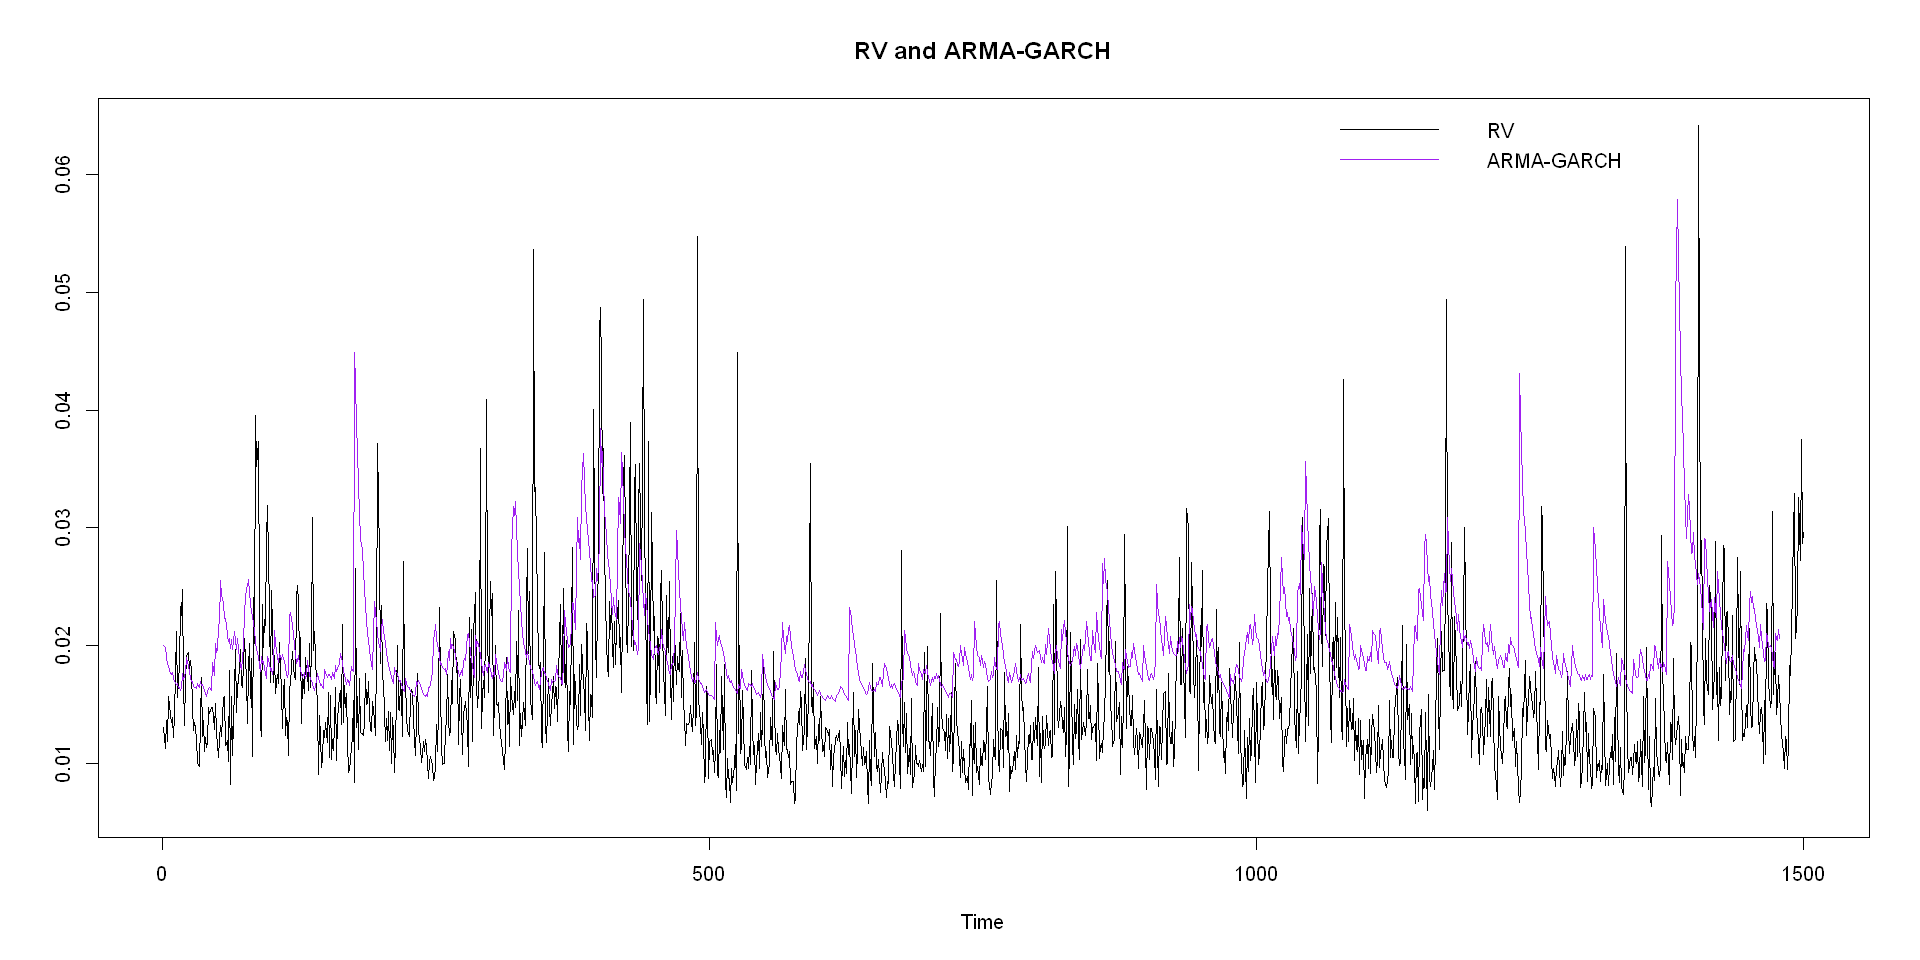

In [24]:
plot.ts((aaba$RV), main = "RV and ARMA-GARCH", ylab = NA)
lines(ARMA_GARCH_fit@fit$sigma[23:1500], col = "purple")
legend("topright", legend = c("RV",  "ARMA-GARCH"),
       col = c("black","purple"), lwd = 1, bty = "n")

# PART 3
## (i) Expanding window

## AR(1)-RV (expanding window)

In [ ]:
n <- 750
w <- (L-n)

AR_RV_expand <- lapply(1:w, function(x) Arima(aaba$RV[x:(n+x),], order = c(1, 0, 0))) # Nemá tu být 1 místo x?

AR_RV_expand_fit <- (lapply(AR_RV_expand, predict, n.ahead = 1))
AR_RV_expand_fit <- sapply(AR_RV_expand_fit, function(x) x$pred)
AR_RV_expand_fit <-xts(AR_RV_expand_fit,order.by = index(aaba[(n+1):(n+w)]))b

In [ ]:
plot.zoo((aaba$RV[751:1500]), ylab = NA,  main = "RV and AR(1)-RV")
lines(zoo(AR_RV_expand_fit), col = "blue", lwd = 1)
legend("topright", legend = c("RV", "AR(1)-RV"),
       col = c("black", "blue"), lwd = 1, bty = "n")

## HAR (expanding window)

In [ ]:
HAR_expand <-lapply(1:w, function(x) HARmodel(data = aaba$RV[x:(n+x),] , periods = c(1,5,22), RVest = c("rCov"),
                                             type = "HAR", h = 1, transform = "sqrt", inputType = "RM"))

HAR_expand_fit <-unlist(lapply(HAR_expand,predict))
HAR_expand_fit <-xts(HAR_expand_fit,order.by = index(aaba[(n+1):(n+w)]))

In [ ]:
plot.zoo((aaba$RV[751:1500]), ylab = NA,  main = "RV and HAR")
lines(zoo(HAR_expand_fit), col = "green", lwd = 1)
legend("topright", legend = c("RV", "HAR"),
       col = c("black", "green"), lwd = 1, bty = "n")

## HAR-RS (expanding window)

In [ ]:
aaba_har <- data.frame(aaba$RV[23:L], RV_1 = aaba$RV[22:(L-1)], aaba$RV_p[22:(L-1)], aaba$RV_n[22:(L-1)], RV5 = RV5[18:(L-5)],RV22 = RV22[1:(L-22)],
                       aaba$RS[22:(L-1)], aaba$RK[22:(L-1)])

N <- nrow(aaba_har) - 750

In [ ]:
HAR_RS_expand_fit <- vector(length = N)

for(i in 1:w){
  HAR_RS_expand <- lm(aaba_har$RV[1:(N+i-1)] ~ aaba_har$RV_n[1:(N+i-1)] + aaba_har$RV_p[1:(N+i-1)] 
                      + aaba_har$RV5[1:(N+i-1)] + aaba_har$RV22[1:(N+i-1)])
  HAR_RS_expand_fit[i] <-  predict(HAR_RS_expand, aaba_har[(N+i),])[i]
}

HAR_RS_expand_fit <- xts((HAR_RS_expand_fit),order.by = index(aaba[(n+1):(n+w)]))


In [ ]:
plot.zoo((aaba$RV[751:1500]), ylab = NA,  main = "RV and HAR-RS")
lines(zoo(HAR_RS_expand_fit), col = "red", lwd = 1)
legend("topright", legend = c("RV", "HAR-RS"),
       col = c("black", "red"), lwd = 1, bty = "n")

## HAR-Rskew-Rkurt (expanding window)

In [ ]:
HAR_Rskew_expand_fit <- vector()

for(i in 1:w){
  HAR_Rskew_expand <- lm(aaba_har$RV[1:(N+i-1)] ~ aaba_har$RV.1[1:(N+i-1)]
                      + aaba_har$RV5[1:(N+i-1)] + aaba_har$RV22[1:(N+i-1)]
                      + aaba_har$RS[1:(N+i-1)] + aaba_har$RK[1:(N+i-1)])
 HAR_Rskew_expand_fit[i] <- predict(HAR_Rskew_expand, aaba_har[(N+i),])[i]
}

HAR_Rskew_expand_fit <- xts((HAR_Rskew_expand_fit),order.by = index(aaba[(n+1):(n+w)]))

In [ ]:
plot.zoo((aaba$RV[751:1500]), ylab = NA,  main = "RV and HAR-Rskew-Rkurt")
lines(zoo(HAR_expand_fit), col = "red", lwd = 1)
legend("topright", legend = c("RV", "HAR-Rskew-Rkurt"),
       col = c("black", "red"), lwd = 1, bty = "n")

## realized GARCH (expanding window)

In [ ]:
realized_GARCH_expand<-ugarchroll(realized_GARCH_spec, 100*aaba$ret[1:(w+n),], n.ahead = 1, forecast.length = w, 
                               n.start = NULL, refit.every = 1, refit.window = c("expanding"), 
                               window.size = n, solver = "solnp", fit.control = list(), 
                               solver.control = list(), calculate.VaR = FALSE, 
                               cluster = NULL, keep.coef = TRUE,realizedVol = 100*aaba$RV)

realized_GARCH_expand 

realized_GARCH_expand_fit<- xts(realized_GARCH_expand@forecast[["density"]]$Sigma, order.by = index(aaba[(n+1):(n+w)]))/100

In [ ]:
plot.zoo((aaba$RV[751:1500]), ylab = NA,  main = "RV and realized GARCH")
lines(zoo(realized_GARCH_expand_fit), col = "orange", lwd = 1)
legend("topright", legend = c("RV", "realized GARCH"),
       col = c("black", "orange"), lwd = 1, bty = "n")

## ARMA-GARCH (expanding window)

In [ ]:
ARMA_GARCH_expand  <-ugarchroll(ARMA_GARCH_spec, 100*aaba$RV[1:(w+n),], n.ahead = 1, forecast.length = w, 
                                n.start = NULL, refit.every = 1, refit.window = c("expanding"), 
                                window.size = n, solver = "solnp", fit.control = list(), 
                                solver.control = list(), calculate.VaR = FALSE, 
                                cluster = NULL, keep.coef = TRUE)

ARMA_GARCH_expand

ARMA_GARCH_expand_fit<- xts(ARMA_GARCH_expand@forecast[["density"]]$Sigma,
                                order.by = index(aaba[(n+1):(n+w)]))/100


In [ ]:
plot.zoo((aaba$RV[751:1500]), ylab = NA,  main = "RV and ARMA-GARCH")
lines(zoo(ARMA_GARCH_expand_fit), col = "purple", lwd = 1)
legend("topright", legend = c("RV", "ARMA-GARCH"),
       col = c("black", "purple"), lwd = 1, bty = "n")

### Comparison of errors

In [ ]:
options(repr.plot.width = 18, repr.plot.height = 8)
par(mfrow = c(1, 2))

plot.ts(RV_750 - AR_RV_expand_fit, ylim = c(-0.02, 0.06), main = "AR(1)-RV")
abline(h = 0, col = "red", lwd = 1, lty = 1)

plot.ts(RV_750 - HAR_expand_fit, ylim = c(-0.02, 0.06), main = "HAR")
abline(h = 0, col = "red", lwd = 1, lty = 1)

plot.ts(RV_750 - HAR_RS_expand_fit, ylim = c(-0.02, 0.06), main = "HAR-RS")
abline(h = 0, col = "red", lwd = 1, lty = 1)

plot.ts(RV_750 - HAR_Rskew_expand_fit, ylim = c(-0.02, 0.06), main = "HAR-Rskew-Rkurt")
abline(h = 0, col = "red", lwd = 1, lty = 1)

plot.ts(RV_750 - realized_GARCH_expand_fit, ylim = c(-0.02, 0.06), main = "realized GARCH")
abline(h = 0, col = "red", lwd = 1, lty = 1)

plot.ts(RV_750 - ARMA_GARCH_expand_fit, ylim = c(-0.02, 0.06), main = "ARMA-GARCH")
abline(h = 0, col = "red", lwd = 1, lty = 1)

### MSE & MAE

In [ ]:

#MSE
MSE_loss <-function(r_vol, forecast){
  return((r_vol - forecast)^2)}
  
RV_750 <- aaba$RV[751:1500]

MSE_AR_RV_expand <- MSE_loss(RV_750, AR_RV_expand_fit)
MSE_HAR_expand <- MSE_loss(RV_750, HAR_expand_fit)
MSE_HAR_RS_expand <- MSE_loss(RV_750, HAR_RS_expand_fit)
MSE_HAR_Rskew_expand <- MSE_loss(RV_750, HAR_Rskew_expand_fit)
MSE_real_GARCH_expand <- MSE_loss(RV_750, realized_GARCH_expand_fit)
MSE_ARMA_GARCH_expand <- MSE_loss(RV_750, ARMA_GARCH_expand_fit)

MSE_expand <- c(mean(MSE_AR_RV_expand), mean(MSE_HAR_expand), mean(MSE_HAR_RS_expand)
                , mean(MSE_HAR_Rskew_expand), mean(MSE_real_GARCH_expand),mean(MSE_ARMA_GARCH_expand))

In [ ]:
#MAE
MAE_loss <-function(r_vol, forecast){
  return(abs(r_vol - forecast))}
  
MAE_AR_RV_expand <- MAE_loss(RV_750, AR_RV_expand_fit)
MAE_HAR_expand <- MAE_loss(RV_750, HAR_expand_fit)
MAE_HAR_RS_expand <- MAE_loss(RV_750, HAR_RS_expand_fit)
MAE_HAR_Rskew_expand <- MAE_loss(RV_750, HAR_Rskew_expand_fit)
MAE_real_GARCH_expand <- MAE_loss(RV_750, realized_GARCH_expand_fit)
MAE_ARMA_GARCH_expand <- MAE_loss(RV_750, ARMA_GARCH_expand_fit)

MAE_expand <- c(mean(MAE_AR_RV_expand), mean(MAE_HAR_expand), mean(MAE_HAR_RS_expand),
                mean(MAE_HAR_Rskew_expand), mean(MAE_real_GARCH_expand),mean(MAE_ARMA_GARCH_expand))


### Diebold-Mariano test

In [ ]:
dm.test(MSE_AR_RV_expand,MSE_HAR_expand,alternative = c("two.sided"))
dm.test(MSE_AR_RV_expand,MAE_HAR_RS_expand,alternative = c("two.sided"))
dm.test(MSE_AR_RV_expand,MAE_HAR_Rskew_expand,alternative = c("two.sided"))
dm.test(MSE_AR_RV_expand,MAE_real_GARCH_expand,alternative = c("two.sided"))
dm.test(MSE_AR_RV_expand,MAE_ARMA_GARCH_expand,alternative = c("two.sided"))

dm.test(MAE_HAR_expand,MAE_HAR_RS_expand,alternative = c("two.sided"))
dm.test(MAE_HAR_expand,MAE_HAR_Rskew_expand,alternative = c("two.sided"))
dm.test(MAE_HAR_expand,MAE_real_GARCH_expand,alternative = c("two.sided"))
dm.test(MAE_HAR_expand,MAE_ARMA_GARCH_expand,alternative = c("two.sided"))

dm.test(MAE_HAR_RS_expand,MAE_HAR_Rskew_expand,alternative = c("two.sided"))
dm.test(MAE_HAR_RS_expand,MAE_real_GARCH_expand,alternative = c("two.sided"))
dm.test(MAE_HAR_RS_expand,MAE_ARMA_GARCH_expand,alternative = c("two.sided"))

dm.test(MAE_HAR_Rskew_expand,MAE_real_GARCH_expand,alternative = c("two.sided"))
dm.test(MAE_HAR_Rskew_expand,MAE_ARMA_GARCH_expand,alternative = c("two.sided"))

dm.test(MAE_real_GARCH_expand,MAE_ARMA_GARCH_expand,alternative = c("two.sided"))

### Minzer-Zarnowitz regression

In [ ]:
MZR_RV_AR_expand <- lm(RV_750 ~ AR_RV_expand_fit)
summary(MZR_RV_AR_expand)

MZR_HAR_expand <- lm(RV_750 ~ MAE_HAR_expand)
summary(MZR_HAR_expand)

MZR_HAR_RS_expand <- lm(RV_750 ~ HAR_RS_expand_fit)
summary(MZR_HAR_RS_expand)

MZR_HAR_Rskew_expand <- lm(RV_750 ~ HAR_Rskew_expand_fit)
summary(MZR_HAR_Rskew_expand)

MZR_real_GARCH_expand <- lm(RV_750 ~ realized_GARCH_expand_fit)
summary(MZR_real_GARCH_expand)

MZR_ARMA_GARCH_expand <- lm(RV_750 ~ MSE_ARMA_GARCH_expand)
summary(MZR_ARMA_GARCH_expand)

## (ii) Rolling window

In [25]:
# Setting the rolling window size
window_size <- 750
w <- (L - window_size)

## AR(1)-RV (rolling window)

In [26]:
# AR(1)-RV (rolling window)
AR_RV_rolling <- lapply(1:w, function(x) Arima(aaba$RV[x:(x + window_size - 1)], order = c(1, 0, 0)))

AR_RV_rolling_fit <- sapply(AR_RV_rolling, function(x) predict(x, n.ahead = 1)$pred)
AR_RV_rolling_fit <- xts(AR_RV_rolling_fit, order.by = index(aaba[(window_size + 1):(window_size + w)]))

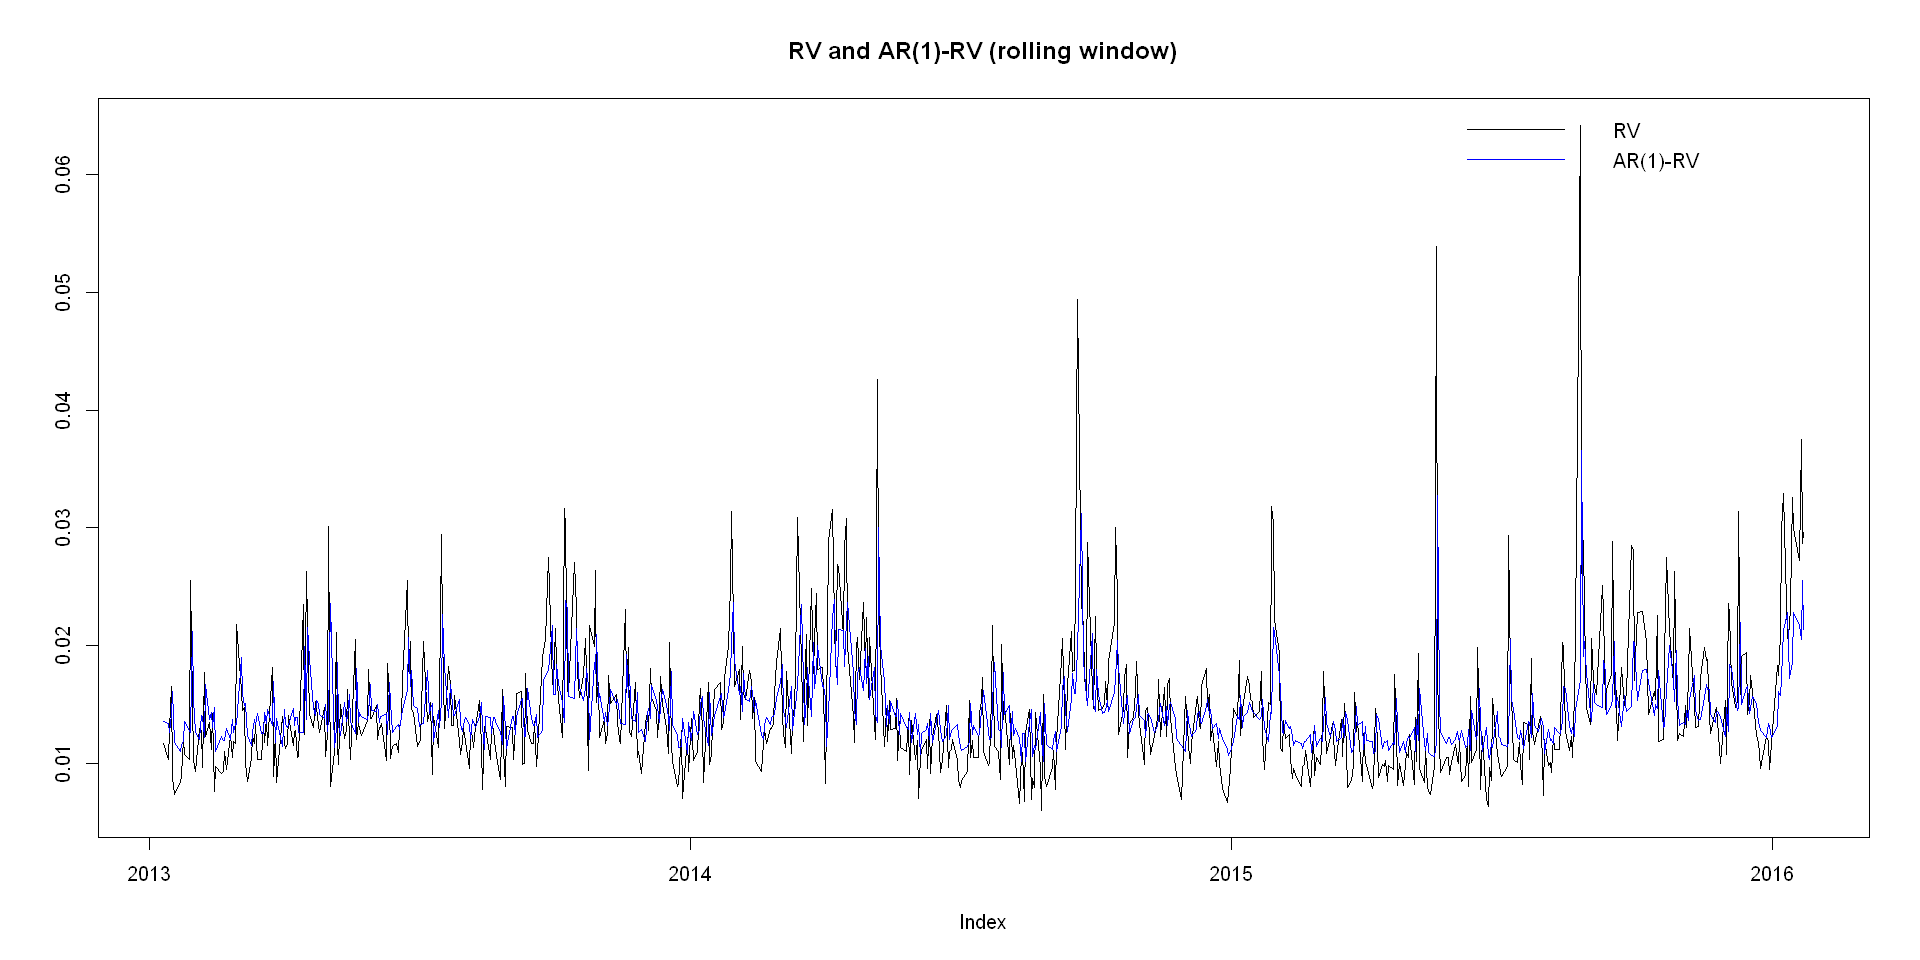

In [27]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and AR(1)-RV (rolling window)")
lines(zoo(AR_RV_rolling_fit), col = "blue", lwd = 1)
legend("topright", legend = c("RV", "AR(1)-RV"), col = c("black", "blue"), lwd = 1, bty = "n")

## HAR (rolling window)

In [28]:
HAR_rolling <- lapply(1:w, function(x) HARmodel(data = aaba$RV[x:(x + window_size - 1)], periods = c(1, 5, 22), RVest = c("rCov"), type = "HAR", h = 1, transform = "sqrt", inputType = "RM"))
HAR_rolling_fit <- unlist(lapply(HAR_rolling, function(x) predict(x)))
HAR_rolling_fit <- xts(HAR_rolling_fit, order.by = index(aaba[(window_size + 1):(window_size + w)]))

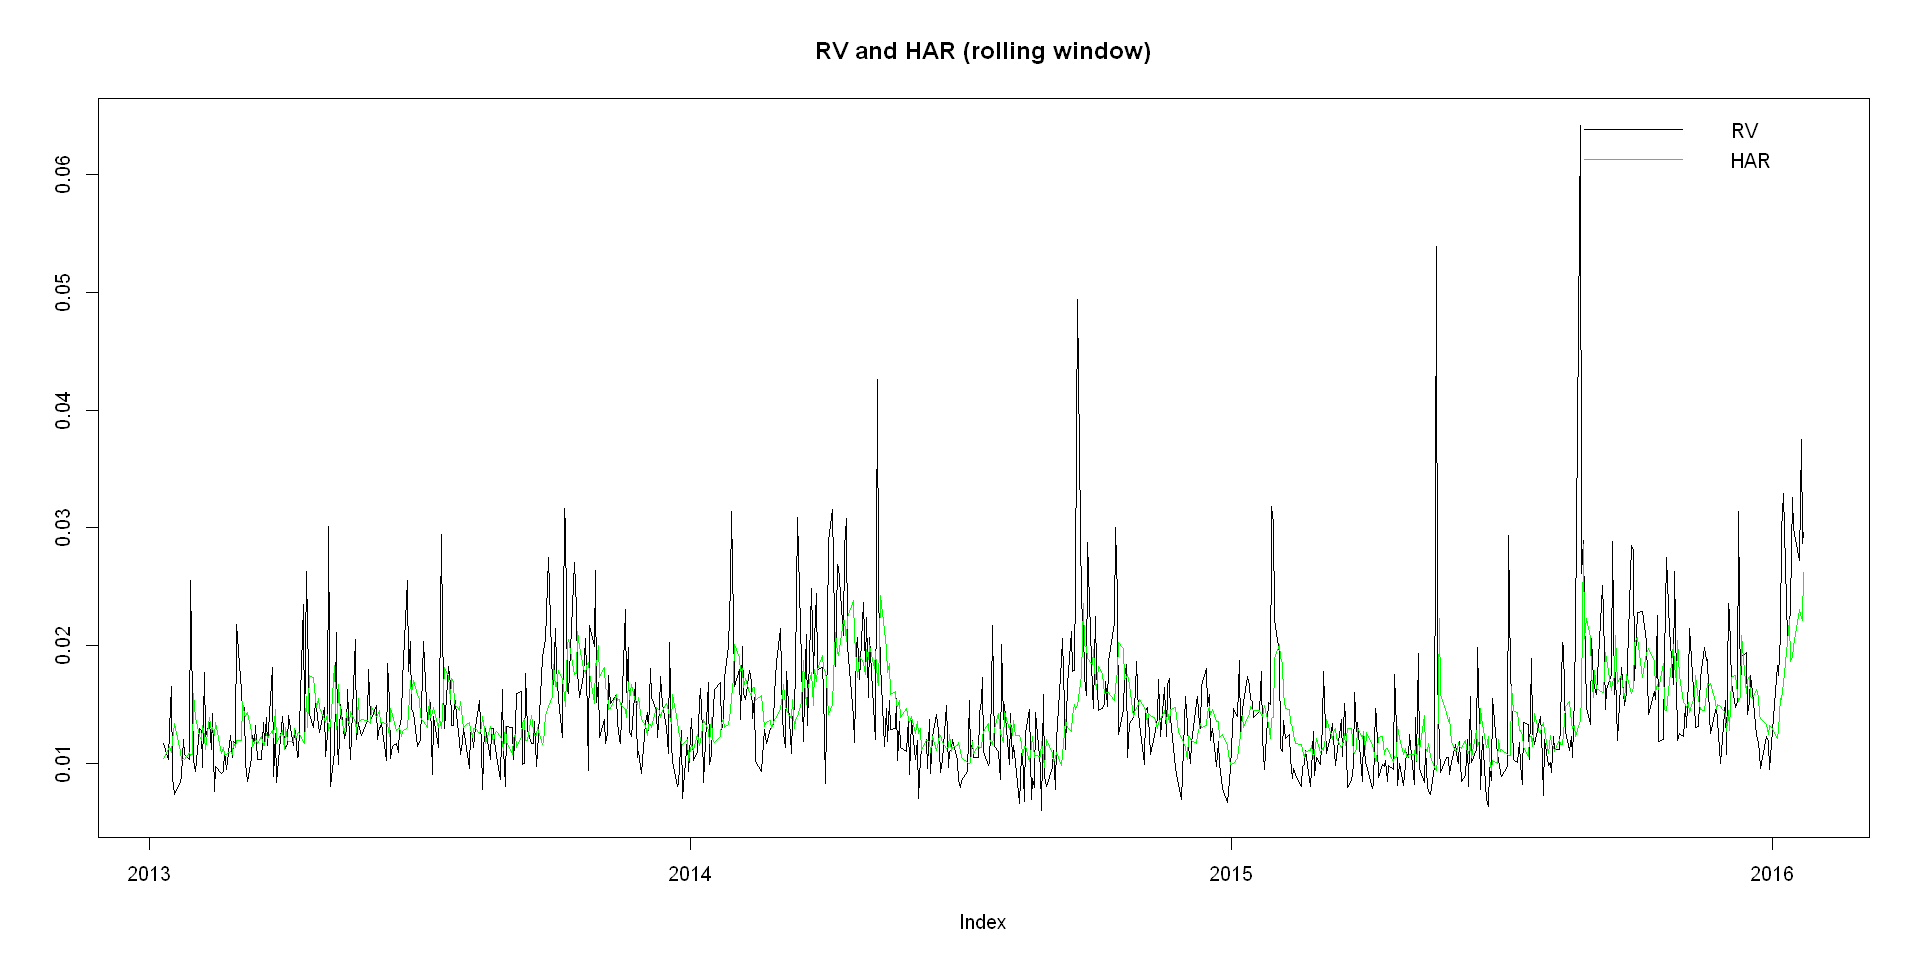

In [29]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and HAR (rolling window)")
lines(zoo(HAR_rolling_fit), col = "green", lwd = 1)
legend("topright", legend = c("RV", "HAR"), col = c("black", "green"), lwd = 1, bty = "n")

## HAR-RS (rolling window)

In [30]:
HAR_RS_rolling_fit <- vector()
for (i in 1:w) {
  HAR_RS_rolling <- lm(aaba$RV[(i + 22):(i + window_size - 1)] ~ aaba$RV_n[(i + 21):(i + window_size - 2)] + aaba$RV_p[(i + 21):(i + window_size - 2)] + RV5[(i + 17):(i + window_size - 6)] + RV22[i:(i + window_size - 23)])
  HAR_RS_rolling_fit[i] <- predict(HAR_RS_rolling, newdata = data.frame(aaba$RV_n[i + window_size - 1], aaba$RV_p[i + window_size - 1], RV5[i + window_size - 5], RV22[i + window_size - 22]))
}
HAR_RS_rolling_fit <- xts(HAR_RS_rolling_fit, order.by = index(aaba[(window_size + 1):(window_size + w)]))

Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_RS_rolling_fit[i] <- predict(HAR_RS_rolling, newdata = data.frame(aaba$RV_n[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_RS_rolling_fit[i] <- predict(HAR_RS_rolling, newdata = data.frame(aaba$RV_n[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_RS_rolling_fit[i] <- predict(HAR_RS_rolling, newdata = data.frame(aaba$RV_n[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_RS_rolling_fit[i] <- predict(HAR_RS_rolling, newdata = data.frame(aaba$RV_n[i + :
"number of items to replace is not a multiple of replacement length"
Warning mess

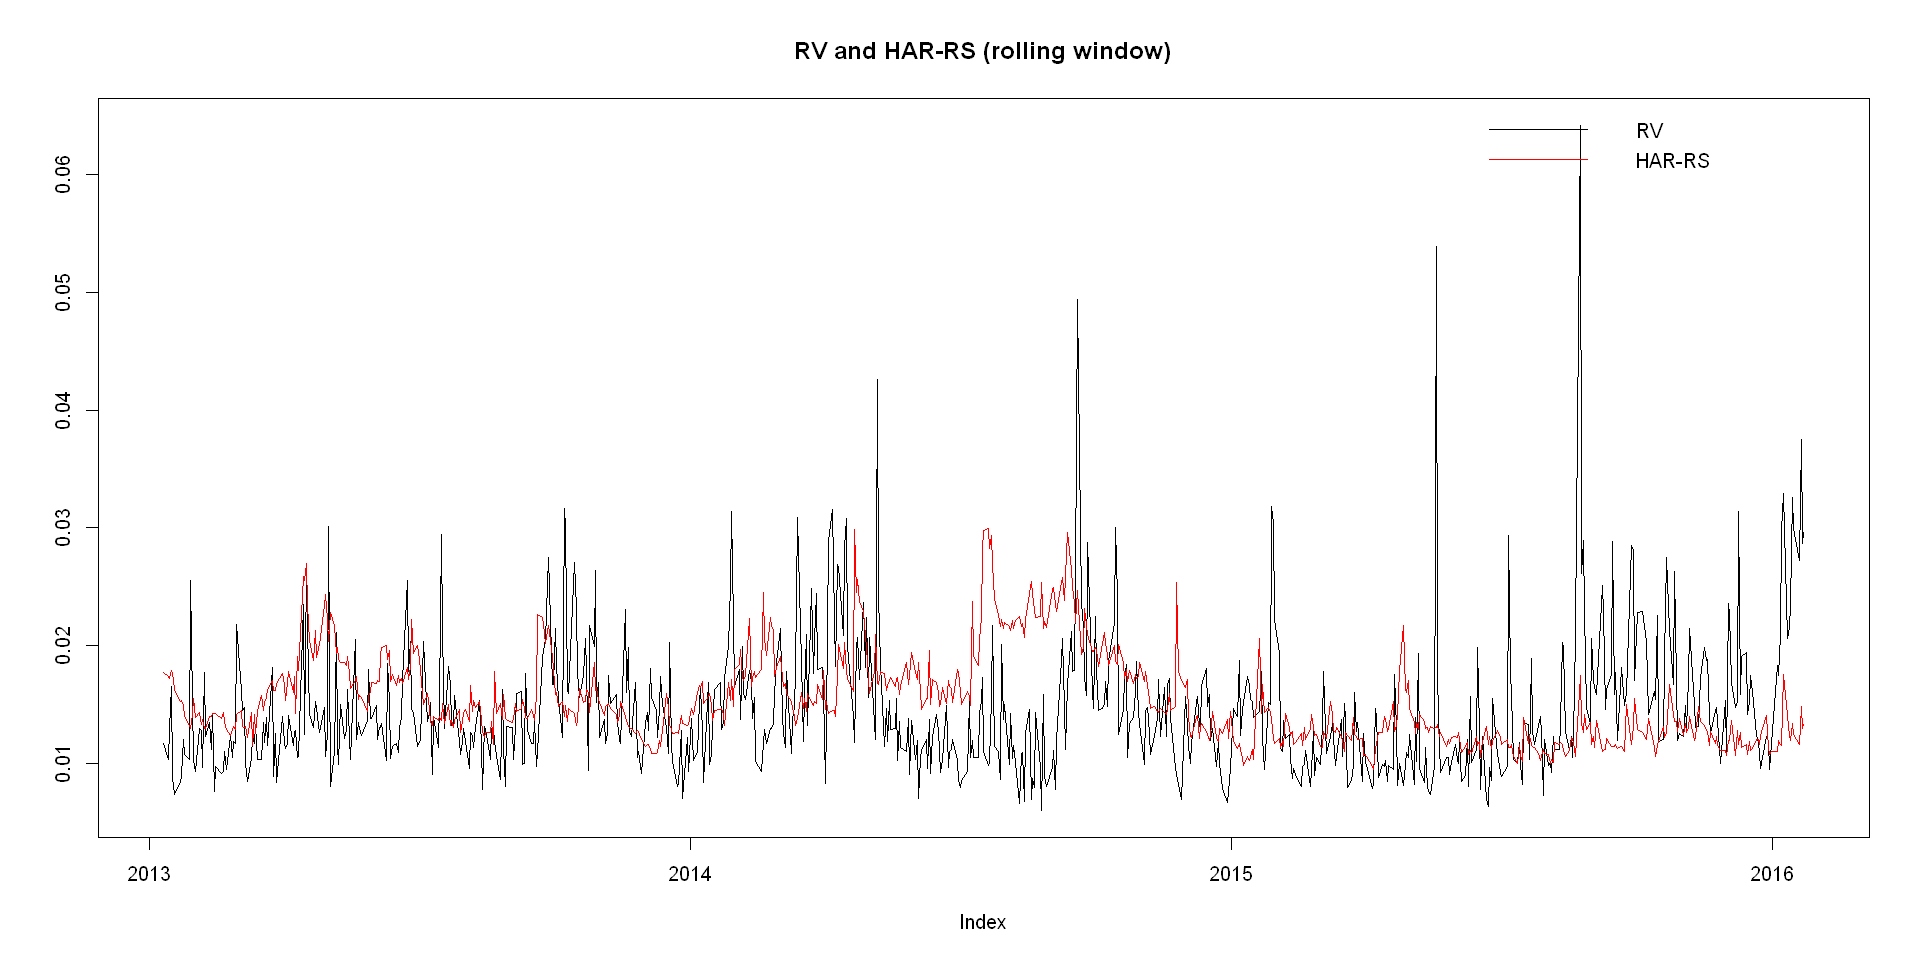

In [31]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and HAR-RS (rolling window)")
lines(zoo(HAR_RS_rolling_fit), col = "red", lwd = 1)
legend("topright", legend = c("RV", "HAR-RS"), col = c("black", "red"), lwd = 1, bty = "n")

## HAR-Rskew-Rkurt (rolling window)

In [32]:
HAR_Rskew_rolling_fit <- vector()
for (i in 1:w) {
  HAR_Rskew_rolling <- lm(aaba$RV[(i + 22):(i + window_size - 1)] ~ aaba$RV[(i + 21):(i + window_size - 2)] + RV5[(i + 17):(i + window_size - 6)] + RV22[i:(i + window_size - 23)] + aaba$RS[(i + 21):(i + window_size - 2)] + aaba$RK[(i + 21):(i + window_size - 2)])
  HAR_Rskew_rolling_fit[i] <- predict(HAR_Rskew_rolling, newdata = data.frame(aaba$RV[i + window_size - 1], RV5[i + window_size - 5], RV22[i + window_size - 22], aaba$RS[i + window_size - 1], aaba$RK[i + window_size - 1]))
}
HAR_Rskew_rolling_fit <- xts(HAR_Rskew_rolling_fit, order.by = index(aaba[(window_size + 1):(window_size + w)]))

Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_Rskew_rolling_fit[i] <- predict(HAR_Rskew_rolling, newdata = data.frame(aaba$RV[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_Rskew_rolling_fit[i] <- predict(HAR_Rskew_rolling, newdata = data.frame(aaba$RV[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_Rskew_rolling_fit[i] <- predict(HAR_Rskew_rolling, newdata = data.frame(aaba$RV[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_Rskew_rolling_fit[i] <- predict(HAR_Rskew_rolling, newdata = data.frame(aaba$RV[i + :
"number of items to replace is not a multiple of replacement leng

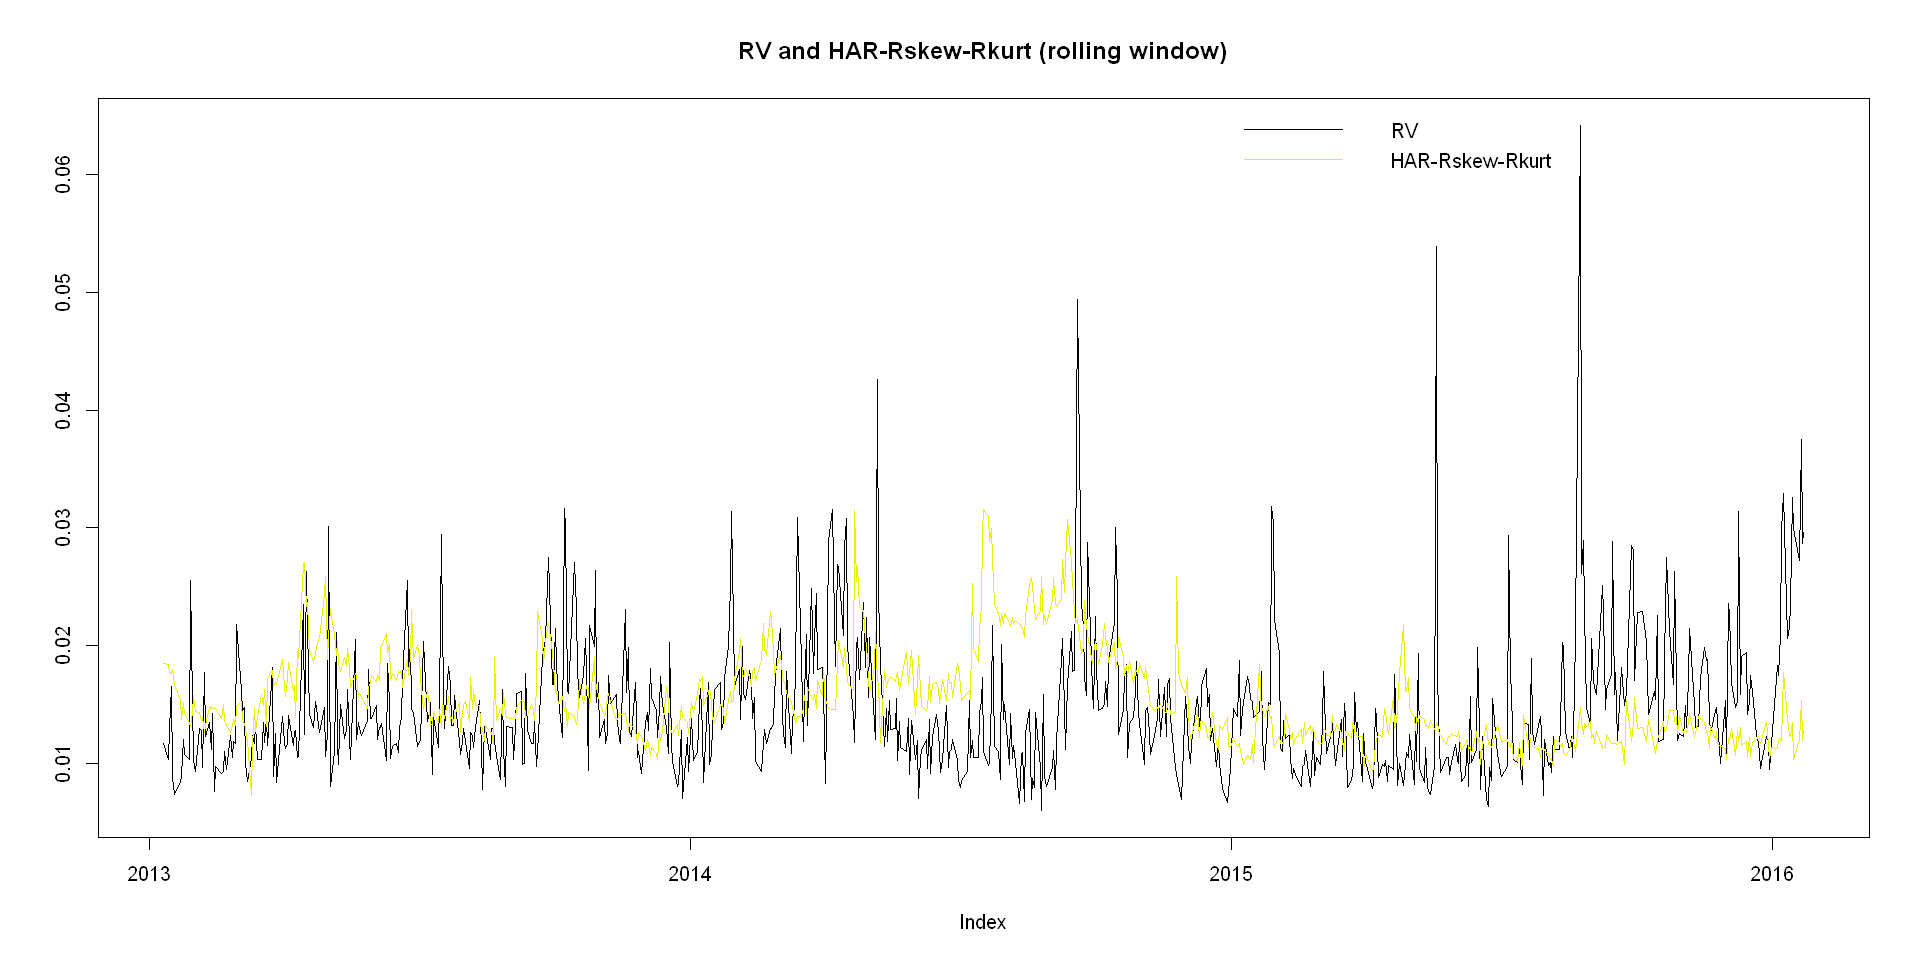

In [33]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and HAR-Rskew-Rkurt (rolling window)")
lines(zoo(HAR_Rskew_rolling_fit), col = "yellow2", lwd = 1)
legend("topright", legend = c("RV", "HAR-Rskew-Rkurt"), col = c("black", "yellow2"), lwd = 1, bty = "n")

## realized GARCH (rolling window)

In [34]:
realized_GARCH_rolling <- ugarchroll(realized_GARCH_spec, 100 * aaba$ret, n.ahead = 1, forecast.length = w, refit.every = 1, refit.window = "moving", window.size = window_size, solver = "hybrid", realizedVol = 100 * aaba$RV)
realized_GARCH_rolling_fit <- xts(realized_GARCH_rolling@forecast[["density"]]$Sigma, order.by = index(aaba[(window_size + 1):(window_size + w)])) / 100

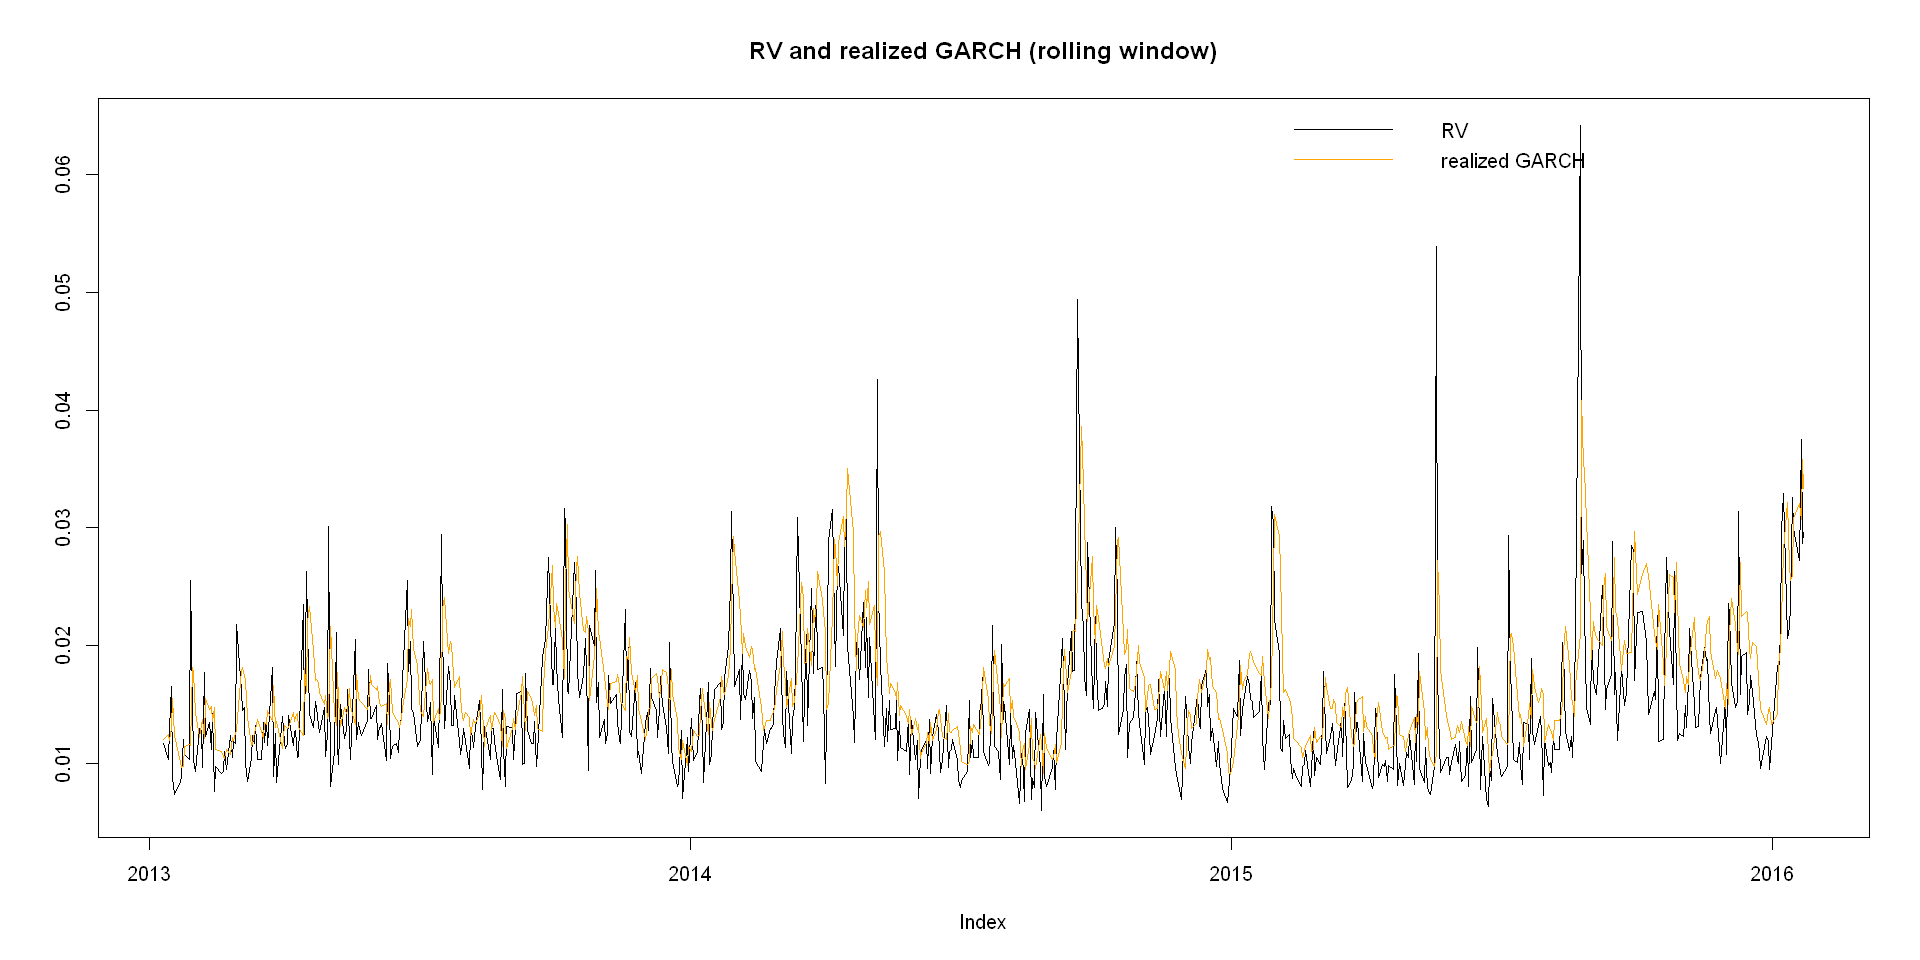

In [36]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and realized GARCH (rolling window)")
lines(zoo(realized_GARCH_rolling_fit), col = "orange", lwd = 1)
legend("topright", legend = c("RV", "realized GARCH"), col = c("black", "orange"), lwd = 1, bty = "n")

## ARMA-GARCH (rolling window)

In [35]:
ARMA_GARCH_rolling <- ugarchroll(ARMA_GARCH_spec, 100 * aaba$ret, n.ahead = 1, forecast.length = w, refit.every = 1, refit.window = "moving", window.size = window_size, solver = "hybrid")
ARMA_GARCH_rolling_fit <- xts(ARMA_GARCH_rolling@forecast[["density"]]$Sigma, order.by = index(aaba[(window_size + 1):(window_size + w)])) / 100

Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mea

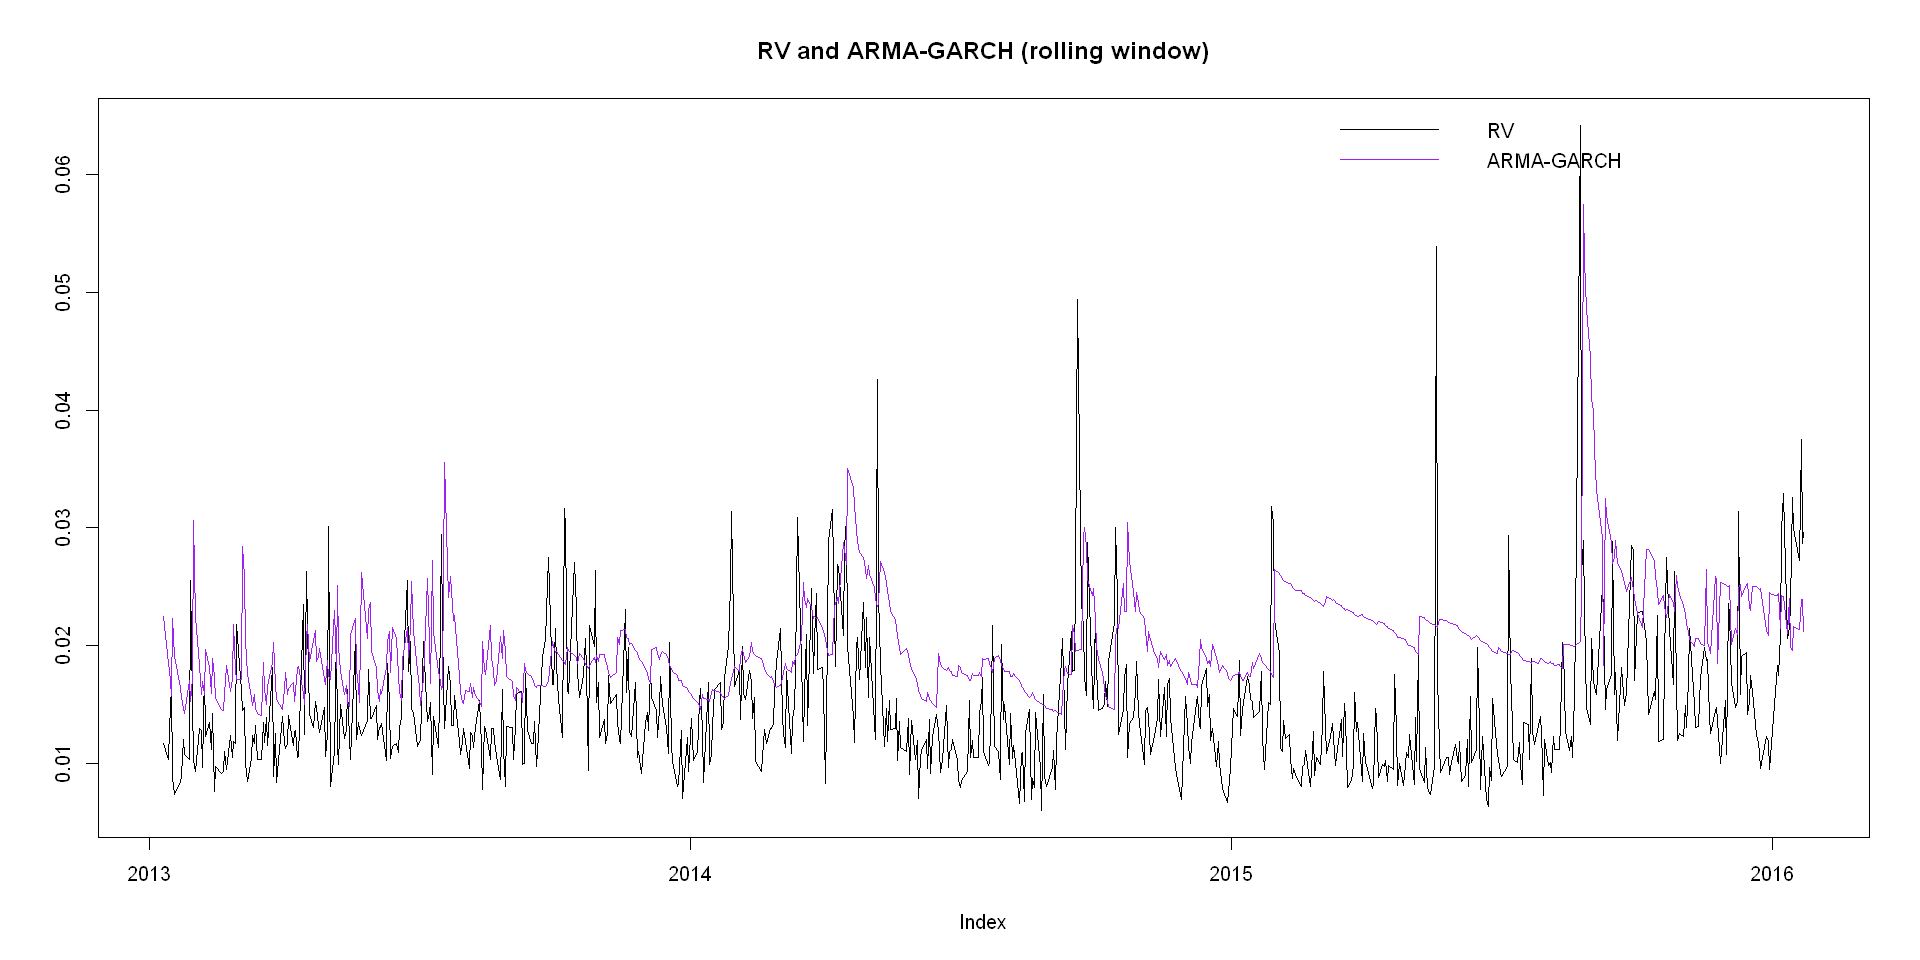

In [37]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and ARMA-GARCH (rolling window)")
lines(zoo(ARMA_GARCH_rolling_fit), col = "purple", lwd = 1)
legend("topright", legend = c("RV", "ARMA-GARCH"), col = c("black", "purple"), lwd = 1, bty = "n")

### Comparison of errors

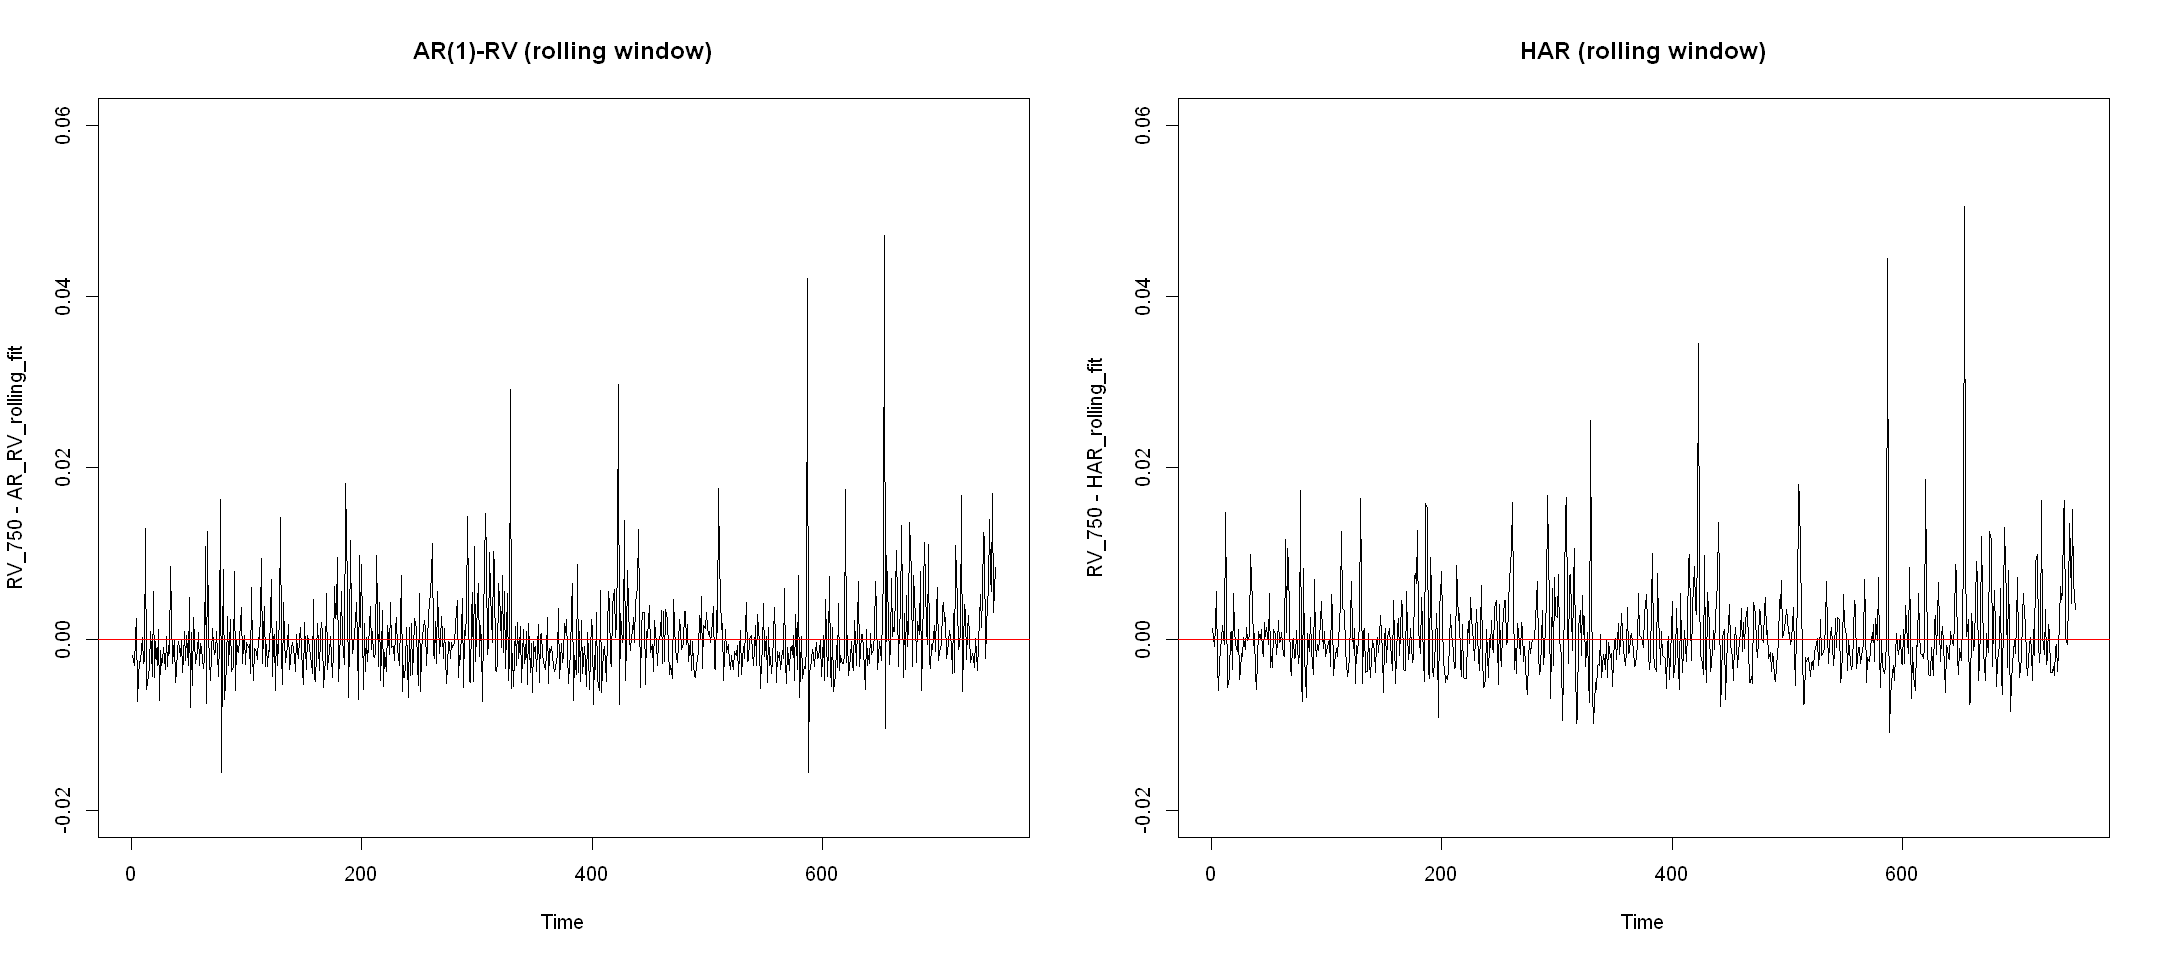

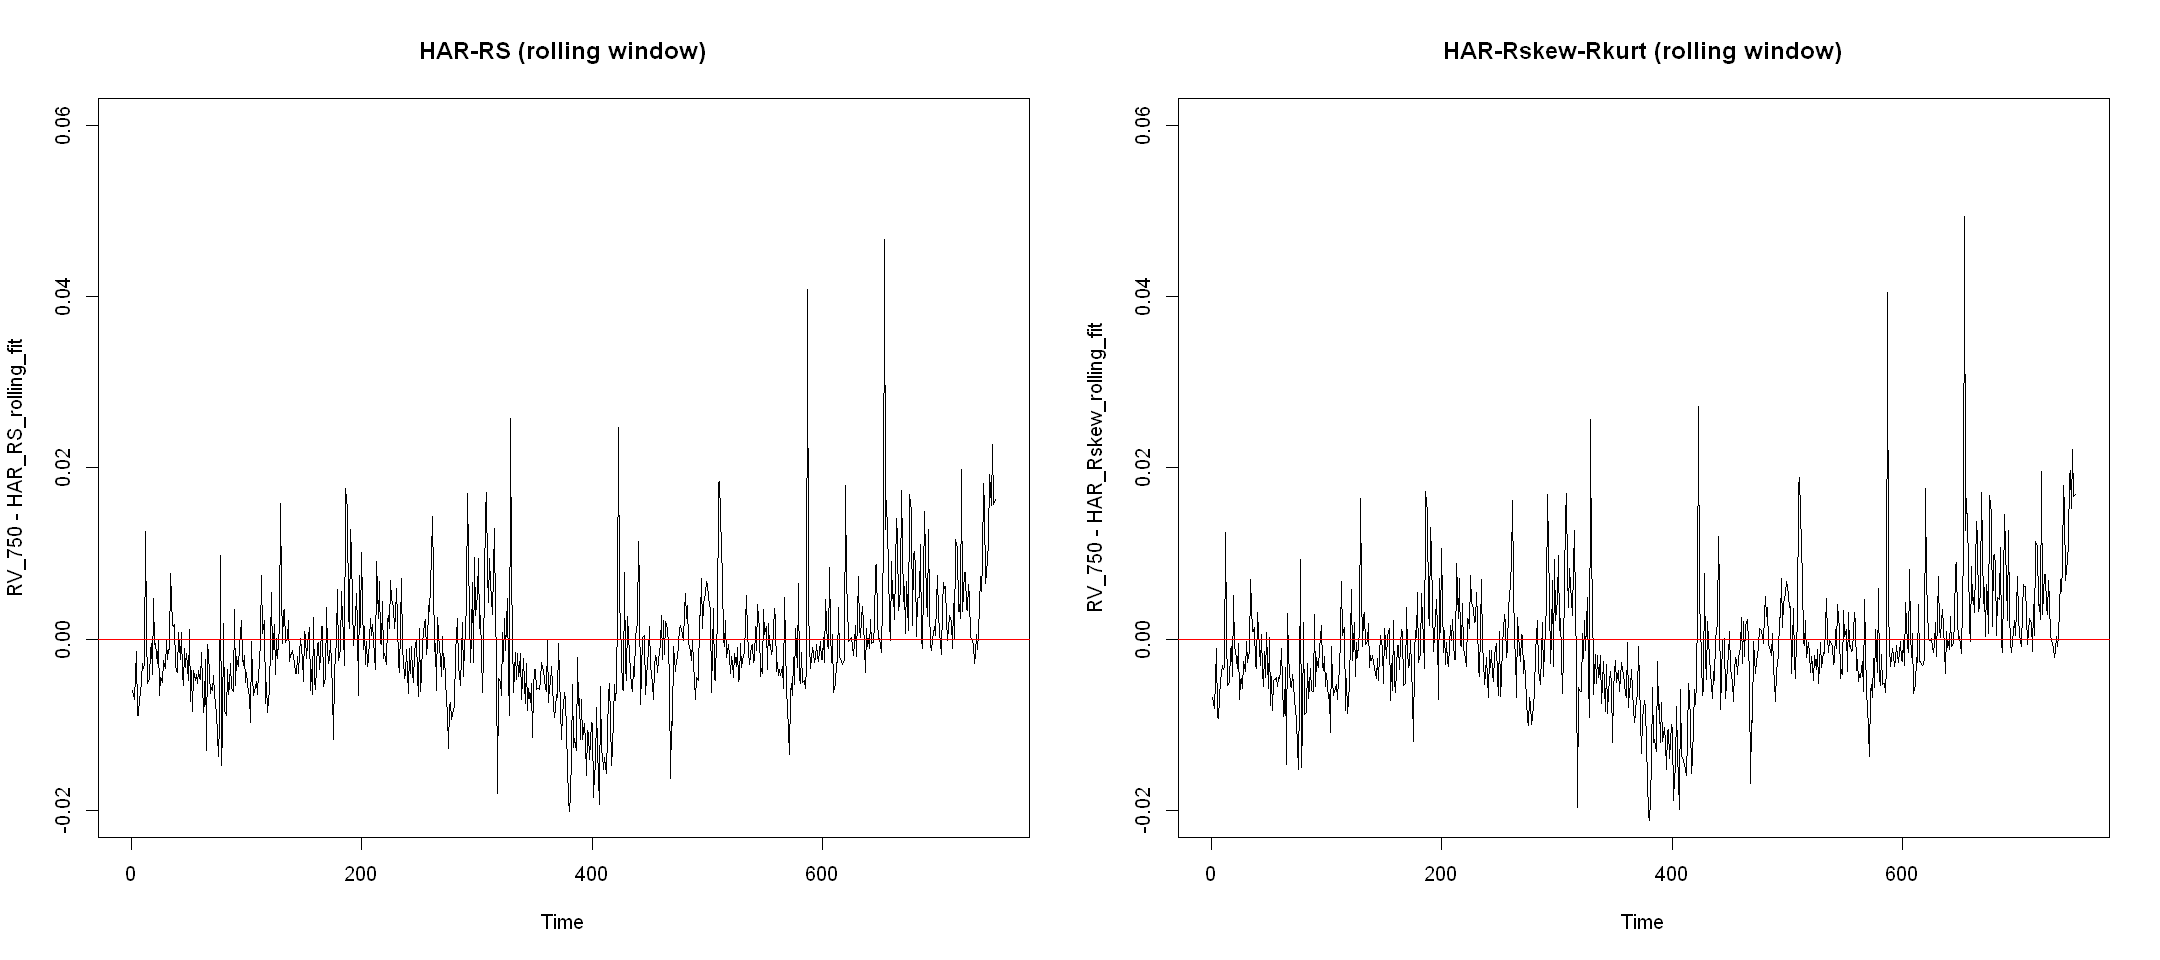

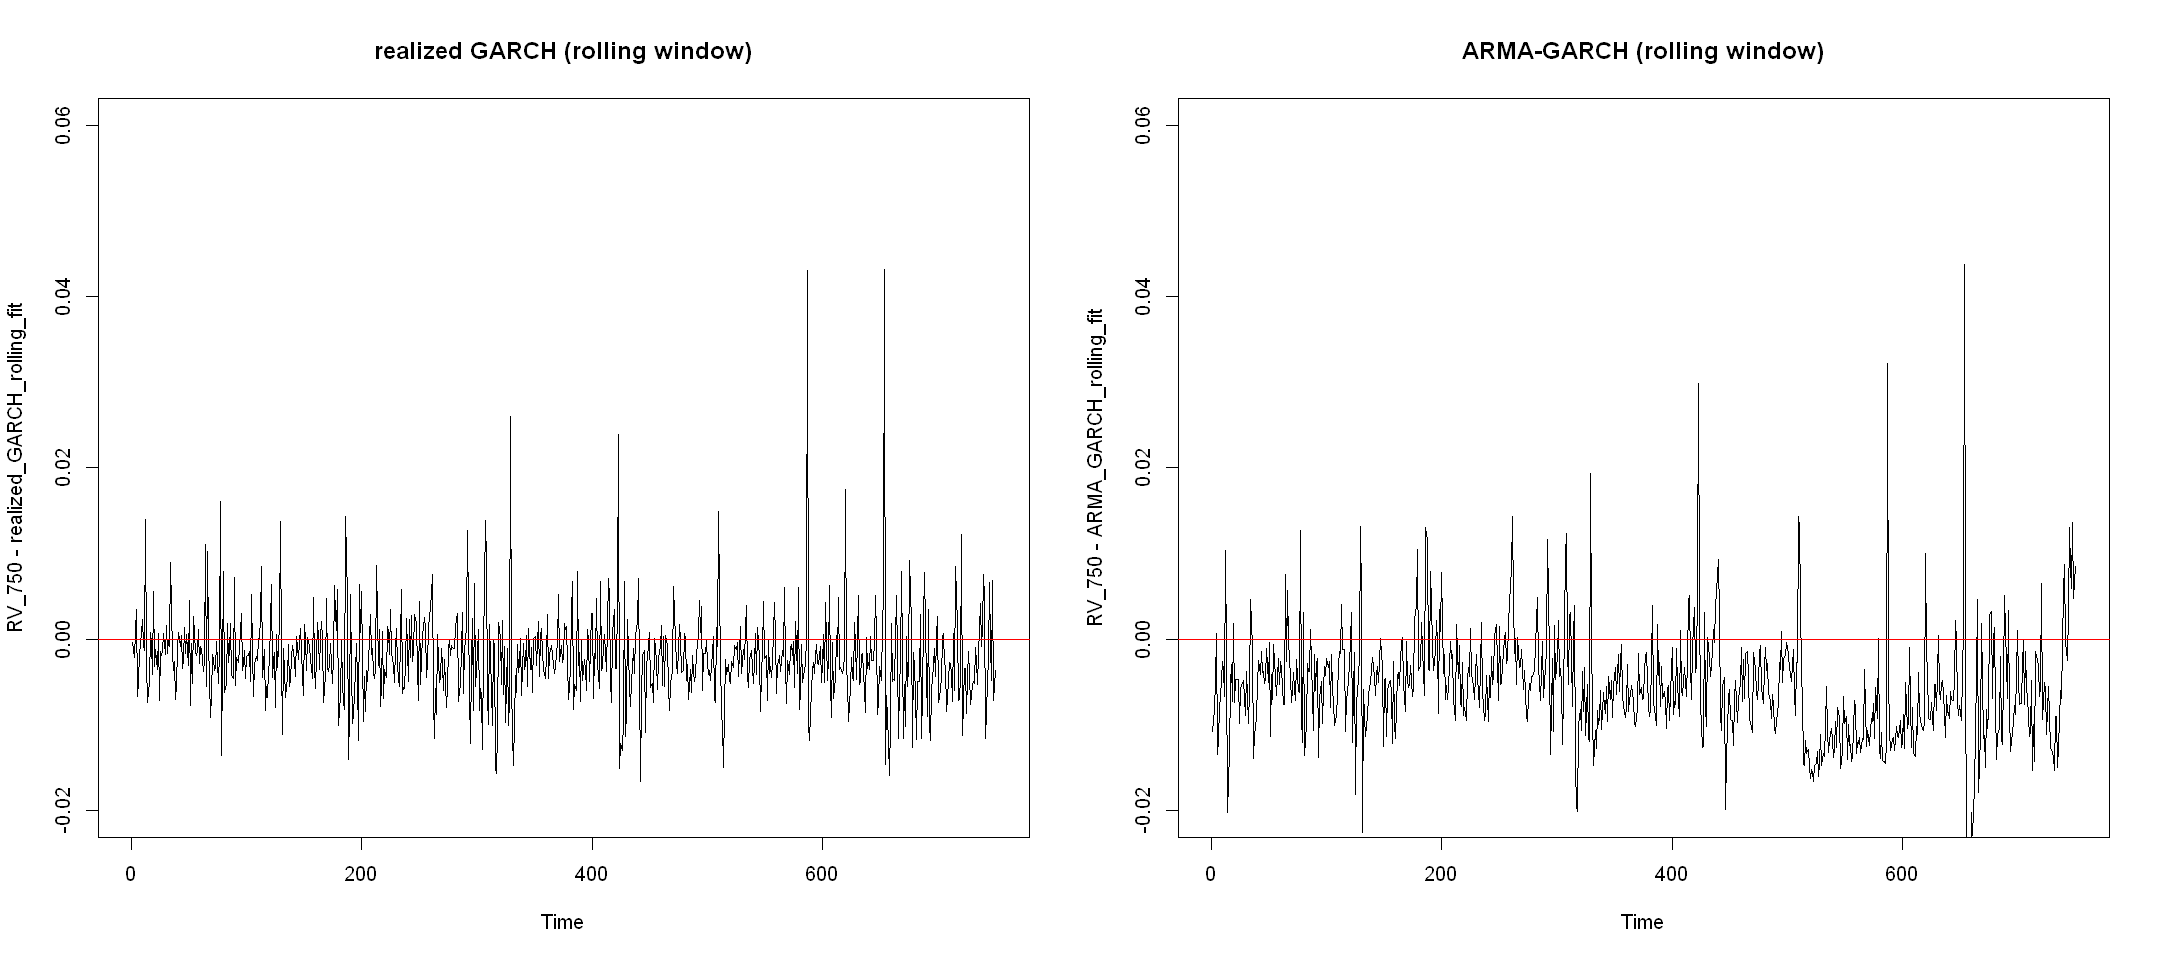

In [39]:
# Setting plot dimensions
options(repr.plot.width = 18, repr.plot.height = 8)
par(mfrow = c(1, 2))

RV_750 <- aaba$RV[751:1500]

# AR(1)-RV errors
plot.ts(RV_750 - AR_RV_rolling_fit, ylim = c(-0.02, 0.06), main = "AR(1)-RV (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

# HAR errors
plot.ts(RV_750 - HAR_rolling_fit, ylim = c(-0.02, 0.06), main = "HAR (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

# HAR-RS errors
plot.ts(RV_750 - HAR_RS_rolling_fit, ylim = c(-0.02, 0.06), main = "HAR-RS (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

# HAR-Rskew-Rkurt errors
plot.ts(RV_750 - HAR_Rskew_rolling_fit, ylim = c(-0.02, 0.06), main = "HAR-Rskew-Rkurt (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

# realized GARCH errors
plot.ts(RV_750 - realized_GARCH_rolling_fit, ylim = c(-0.02, 0.06), main = "realized GARCH (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

# ARMA-GARCH errors
plot.ts(RV_750 - ARMA_GARCH_rolling_fit, ylim = c(-0.02, 0.06), main = "ARMA-GARCH (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

### MSE & MAE

In [40]:
# MSE function
MSE_loss <- function(r_vol, forecast) {
  return((r_vol - forecast)^2)
}

# Calculate MSE for each model
MSE_AR_RV_rolling <- MSE_loss(RV_750, AR_RV_rolling_fit)
MSE_HAR_rolling <- MSE_loss(RV_750, HAR_rolling_fit)
MSE_HAR_RS_rolling <- MSE_loss(RV_750, HAR_RS_rolling_fit)
MSE_HAR_Rskew_rolling <- MSE_loss(RV_750, HAR_Rskew_rolling_fit)
MSE_real_GARCH_rolling <- MSE_loss(RV_750, realized_GARCH_rolling_fit)
MSE_ARMA_GARCH_rolling <- MSE_loss(RV_750, ARMA_GARCH_rolling_fit)

# Calculate mean MSE for each model
MSE_rolling <- c(mean(MSE_AR_RV_rolling), mean(MSE_HAR_rolling), mean(MSE_HAR_RS_rolling), mean(MSE_HAR_Rskew_rolling), mean(MSE_real_GARCH_rolling), mean(MSE_ARMA_GARCH_rolling))


In [44]:
# MAE function
MAE_loss <- function(r_vol, forecast) {
  return(abs(r_vol - forecast))
}

# Calculate MAE for each model
MAE_AR_RV_rolling <- MAE_loss(RV_750, AR_RV_rolling_fit)
MAE_HAR_rolling <- MAE_loss(RV_750, HAR_rolling_fit)
MAE_HAR_RS_rolling <- MAE_loss(RV_750, HAR_RS_rolling_fit)
MAE_HAR_Rskew_rolling <- MAE_loss(RV_750, HAR_Rskew_rolling_fit)
MAE_real_GARCH_rolling <- MAE_loss(RV_750, realized_GARCH_rolling_fit)
MAE_ARMA_GARCH_rolling <- MAE_loss(RV_750, ARMA_GARCH_rolling_fit)

# Calculate mean MAE for each model
MAE_rolling <- c(mean(MAE_AR_RV_rolling), mean(MAE_HAR_rolling), mean(MAE_HAR_RS_rolling), mean(MAE_HAR_Rskew_rolling), mean(MAE_real_GARCH_rolling), mean(MAE_ARMA_GARCH_rolling))

# Results
MAE_rolling

[1] 0.003450700 0.003540061 0.004942103 0.005016336 0.004328114 0.007147115

### Diebold-Mariano test

In [45]:
# Perform Diebold-Mariano test for each pair of models using MSE loss
dm.test(MSE_AR_RV_rolling, MSE_HAR_rolling, alternative = "two.sided")
dm.test(MSE_AR_RV_rolling, MSE_HAR_RS_rolling, alternative = "two.sided")
dm.test(MSE_AR_RV_rolling, MSE_HAR_Rskew_rolling, alternative = "two.sided")
dm.test(MSE_AR_RV_rolling, MSE_real_GARCH_rolling, alternative = "two.sided")
dm.test(MSE_AR_RV_rolling, MSE_ARMA_GARCH_rolling, alternative = "two.sided")

dm.test(MSE_HAR_rolling, MSE_HAR_RS_rolling, alternative = "two.sided")
dm.test(MSE_HAR_rolling, MSE_HAR_Rskew_rolling, alternative = "two.sided")
dm.test(MSE_HAR_rolling, MSE_real_GARCH_rolling, alternative = "two.sided")
dm.test(MSE_HAR_rolling, MSE_ARMA_GARCH_rolling, alternative = "two.sided")

dm.test(MSE_HAR_RS_rolling, MSE_HAR_Rskew_rolling, alternative = "two.sided")
dm.test(MSE_HAR_RS_rolling, MSE_real_GARCH_rolling, alternative = "two.sided")
dm.test(MSE_HAR_RS_rolling, MSE_ARMA_GARCH_rolling, alternative = "two.sided")

dm.test(MSE_HAR_Rskew_rolling, MSE_real_GARCH_rolling, alternative = "two.sided")
dm.test(MSE_HAR_Rskew_rolling, MSE_ARMA_GARCH_rolling, alternative = "two.sided")

dm.test(MSE_real_GARCH_rolling, MSE_ARMA_GARCH_rolling, alternative = "two.sided")


	Diebold-Mariano Test

data:  MSE_AR_RV_rollingMSE_HAR_rolling
DM = -1.5785, Forecast horizon = 1, Loss function power = 2, p-value =
0.1149
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_AR_RV_rollingMSE_HAR_RS_rolling
DM = -2.6423, Forecast horizon = 1, Loss function power = 2, p-value =
0.008407
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_AR_RV_rollingMSE_HAR_Rskew_rolling
DM = -2.8771, Forecast horizon = 1, Loss function power = 2, p-value =
0.004128
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_AR_RV_rollingMSE_real_GARCH_rolling
DM = 0.87626, Forecast horizon = 1, Loss function power = 2, p-value =
0.3812
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_AR_RV_rollingMSE_ARMA_GARCH_rolling
DM = -1.6969, Forecast horizon = 1, Loss function power = 2, p-value =
0.09014
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_HAR_rollingMSE_HAR_RS_rolling
DM = 0.36296, Forecast horizon = 1, Loss function power = 2, p-value =
0.7167
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_HAR_rollingMSE_HAR_Rskew_rolling
DM = -0.44797, Forecast horizon = 1, Loss function power = 2, p-value =
0.6543
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_HAR_rollingMSE_real_GARCH_rolling
DM = 1.3443, Forecast horizon = 1, Loss function power = 2, p-value =
0.1793
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_HAR_rollingMSE_ARMA_GARCH_rolling
DM = -0.52797, Forecast horizon = 1, Loss function power = 2, p-value =
0.5977
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_HAR_RS_rollingMSE_HAR_Rskew_rolling
DM = -1.335, Forecast horizon = 1, Loss function power = 2, p-value =
0.1823
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_HAR_RS_rollingMSE_real_GARCH_rolling
DM = 2.2697, Forecast horizon = 1, Loss function power = 2, p-value =
0.02351
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_HAR_RS_rollingMSE_ARMA_GARCH_rolling
DM = -1.1169, Forecast horizon = 1, Loss function power = 2, p-value =
0.2644
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_HAR_Rskew_rollingMSE_real_GARCH_rolling
DM = 1.9314, Forecast horizon = 1, Loss function power = 2, p-value =
0.05381
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_HAR_Rskew_rollingMSE_ARMA_GARCH_rolling
DM = -0.46885, Forecast horizon = 1, Loss function power = 2, p-value =
0.6393
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_real_GARCH_rollingMSE_ARMA_GARCH_rolling
DM = -2.1849, Forecast horizon = 1, Loss function power = 2, p-value =
0.02921
alternative hypothesis: two.sided


### Minzer-Zarnowitz regression

In [46]:
# Perform Minzer-Zarnowitz regression for each model
MZR_RV_AR_rolling <- lm(RV_750 ~ AR_RV_rolling_fit)
summary(MZR_RV_AR_rolling)

MZR_HAR_rolling <- lm(RV_750 ~ HAR_rolling_fit)
summary(MZR_HAR_rolling)

MZR_HAR_RS_rolling <- lm(RV_750 ~ HAR_RS_rolling_fit)
summary(MZR_HAR_RS_rolling)

MZR_HAR_Rskew_rolling <- lm(RV_750 ~ HAR_Rskew_rolling_fit)
summary(MZR_HAR_Rskew_rolling)

MZR_real_GARCH_rolling <- lm(RV_750 ~ realized_GARCH_rolling_fit)
summary(MZR_real_GARCH_rolling)

MZR_ARMA_GARCH_rolling <- lm(RV_750 ~ ARMA_GARCH_rolling_fit)
summary(MZR_ARMA_GARCH_rolling)


Call:
lm(formula = RV_750 ~ AR_RV_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.015298 -0.003115 -0.001052  0.001827  0.047111 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.0007786  0.0009648   0.807     0.42    
AR_RV_rolling_fit 0.9548190  0.0652540  14.632   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005197 on 748 degrees of freedom
Multiple R-squared:  0.2225,	Adjusted R-squared:  0.2215 
F-statistic: 214.1 on 1 and 748 DF,  p-value: < 2.2e-16



Call:
lm(formula = RV_750 ~ HAR_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009797 -0.003087 -0.001042  0.001732  0.049989 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0031698  0.0009873   3.211  0.00138 ** 
HAR_rolling_fit 0.8102362  0.0684516  11.837  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005409 on 748 degrees of freedom
Multiple R-squared:  0.1578,	Adjusted R-squared:  0.1566 
F-statistic: 140.1 on 1 and 748 DF,  p-value: < 2.2e-16



Call:
lm(formula = RV_750 ~ HAR_RS_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009571 -0.003826 -0.001363  0.002147  0.049347 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.013150   0.000889  14.792   <2e-16 ***
HAR_RS_rolling_fit 0.095654   0.056154   1.703   0.0889 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005882 on 748 degrees of freedom
Multiple R-squared:  0.003864,	Adjusted R-squared:  0.002532 
F-statistic: 2.902 on 1 and 748 DF,  p-value: 0.0889



Call:
lm(formula = RV_750 ~ HAR_Rskew_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009257 -0.003856 -0.001440  0.002124  0.049590 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.013673   0.000875  15.626   <2e-16 ***
HAR_Rskew_rolling_fit 0.061332   0.054921   1.117    0.264    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005889 on 748 degrees of freedom
Multiple R-squared:  0.001664,	Adjusted R-squared:  0.0003298 
F-statistic: 1.247 on 1 and 748 DF,  p-value: 0.2645



Call:
lm(formula = RV_750 ~ realized_GARCH_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009509 -0.003066 -0.001034  0.001679  0.047037 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.0046333  0.0006422   7.214 1.33e-12 ***
realized_GARCH_rolling_fit 0.5946998  0.0366235  16.238  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005068 on 748 degrees of freedom
Multiple R-squared:  0.2606,	Adjusted R-squared:  0.2596 
F-statistic: 263.7 on 1 and 748 DF,  p-value: < 2.2e-16



Call:
lm(formula = RV_750 ~ ARMA_GARCH_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.008240 -0.003631 -0.001137  0.002075  0.049524 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.0093435  0.0009927   9.413  < 2e-16 ***
ARMA_GARCH_rolling_fit 0.2606902  0.0479236   5.440 7.23e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.00578 on 748 degrees of freedom
Multiple R-squared:  0.03805,	Adjusted R-squared:  0.03677 
F-statistic: 29.59 on 1 and 748 DF,  p-value: 7.235e-08


# PART 4